# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

### Descripci√≥n del proyecto

El servicio de telefon√≠a virtual CallMeMaybe est√° desarrollando una nueva funci√≥n que brindar√° a los supervisores y las supervisores informaci√≥n sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Adem√°s, si se supone que un operador debe realizar llamadas salientes, un n√∫mero reducido de ellas tambi√©n ser√° un signo de ineficacia.


### Descripci√≥n de los datos

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estad√≠sticas
- `direction`: "direcci√≥n" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: n√∫mero de llamadas
- `call_duration`: duraci√≥n de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duraci√≥n de la llamada (incluido el tiempo de espera)


El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

## üìö Tabla de Contenidos

* **1. Carga y preparaci√≥n inicial**
    * 1.1. Cargar librer√≠as
    * 1.2. Cargar datasets
    * 1.3. Visualizaci√≥n inicial de los datos
***
* **2. Exploraci√≥n y limpieza de los datos**
    * 2.1. An√°lisis de estructura
    * 2.2. Estad√≠sticos descriptivos
    * 2.3. An√°lisis temporal
    * 2.4. Mejorar la calidad de los datos
        * 2.4.1. Remoci√≥n de duplicados
        * 2.4.2. Tratamiento de valores ausentes
        * 2.4.3. Correcci√≥n de valores extremos
***
* **3. Identificaci√≥n de operadores ineficaces**
    * 3.1. C√°lculo de eficiencia en m√©tricas clave
        * 3.1.1. Tasa de llamadas perdidas
        * 3.1.2. Tiempo de espera promedio
        * 3.1.3. Radio de llamadas salientes
    * 3.2. Conclusiones sobre las m√©tricas clave
    * 3.3. Establecer los umbrales de ineficiencia
    * 3.4. Segmentaci√≥n y clasificaci√≥n de operadores
        * 3.4.1. Graficar los operadores ineficientes
***
* **4. An√°lisis de relaciones entre variables**
    * 4.1. An√°lisis de cohortes
    * 4.2. Evoluci√≥n de m√©tricas por cohorte y semana
    * 4.3. Matriz de correlaci√≥n entre m√©tricas clave
***
* **5. Hip√≥tesis y pruebas estad√≠sticas**
    * 5.1. Elaboraci√≥n de hip√≥tesis
    * 5.2. Selecci√≥n y justificaci√≥n de pruebas estad√≠sticas
    * 5.3. Pruebas de normalidad y varianza de las muestras
    * 5.4. Ejecuci√≥n de pruebas ANOVA
    * 5.5. Interpretaci√≥n de resultados
***
* **6. Conclusiones y recomendaciones**
    * 6.1. Resumen de hallazgos del an√°lisis y conclusiones
    * 6.2. Recomendaciones operativas y l√≠neas futuras de an√°lisis
        * 6.2.1. Recomendaciones operativas
        * 6.2.2. L√≠neas futuras de an√°lisis

# 1. Carga y preparaci√≥n inicial

## 1.1. Cargar librer√≠as  


In [1]:
# Cargar librer√≠as 

%pip install seaborn
%pip install matplotlib 
%pip install pingouin 
%pip install scipy

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import shapiro
import pingouin as pg
from scipy.stats import kruskal

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1.2. Cargar datasets  


In [2]:
# Cargar datasets

calls = pd.read_csv('telecom_dataset_us.csv')
clients = pd.read_csv('telecom_clients_us.csv')

## 1.3. Visualizaci√≥n inicial de los datos

In [3]:
# Mostrar los conjuntos de datos

# Llamadas
print("Dataset Llamadas: \n", calls.head())

Dataset Llamadas: 
    user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  


In [4]:
# Aplicar el metodo info al df calls

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
# Clientes

print("Dataset Clientes: \n", clients.head())

Dataset Clientes: 
    user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16


In [6]:
# Aplicar el metodo info al df clients

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


# 2. Exploraci√≥n y limpieza de los datos

## 2.1 An√°lisis de estructura 

#### Calls

In [7]:
# Mostrar valores unicos para las columnas

print(f"El numero de valores unicos para cada columna es: \n{calls.nunique()}")

El numero de valores unicos para cada columna es: 
user_id                 307
date                    119
direction                 2
internal                  2
operator_id            1092
is_missed_call            2
calls_count             502
call_duration          5373
total_call_duration    6040
dtype: int64


In [8]:
# Mostrar los valores minimos y maximos de las columnas

print(f"Los valores minimos de las columnas son: \n{calls.min()}")
print()
print(f"Los valores maximos de las columnas son: \n{calls.max()}")

Los valores minimos de las columnas son: 
user_id                                   166377
date                   2019-08-02 00:00:00+03:00
direction                                     in
internal                                   False
operator_id                             879896.0
is_missed_call                             False
calls_count                                    1
call_duration                                  0
total_call_duration                            0
dtype: object

Los valores maximos de las columnas son: 
user_id                                   168606
date                   2019-11-28 00:00:00+03:00
direction                                    out
internal                                    True
operator_id                             973286.0
is_missed_call                              True
calls_count                                 4817
call_duration                             144395
total_call_duration                       166155
dtype: object


#### Observaciones sobre la estructura del df Calls:

La columna 'internal', aparece como tipo object, sin embargo las informaci√≥n que posee muestra una respuesta booleana. Parece que esta columna tiene 118 valores ausentes, asi que tendremos que averiguar si es posible obtener los contenidos basandonos en la data de las otras columnas. Es necesario transformar los tipos de datos de la columna 'date' e 'internal', asi como posiblemente de 'direction' al solamente haber dos posibles direcciones de llamada (in/out).

En cuestion de rangos min-max, podemos destacar que el rango de fechas consta de aproximadamente cuatro meses entre agosto y noviembre de 2019. El conteo de llamadas fluctua entre 1 y 4817, mientras que la duracion de la llamada va de zero hasta 144,395 (Lo que representa mas de 40 horas!) y siendo la duracion total inclusive mas longeva con 166155 segundos (46.15 horas) Es necesario investigar si estos valores se tratan de errores en la recoleccion de los datos o simplemente de 'outliers'.


#### Clients


In [9]:
# Mostrar valores unicos para las columnas

print(f"El numero de valores unicos para cada columna es: \n{clients.nunique()}")

El numero de valores unicos para cada columna es: 
user_id        732
tariff_plan      3
date_start      73
dtype: int64


In [10]:
print(f"Las fechas de comienzo de clientes se encuentran entre {clients['date_start'].min()} y {clients['date_start'].max()}")

Las fechas de comienzo de clientes se encuentran entre 2019-08-01 y 2019-10-31


#### Observaciones sobre la estructura del df Clients:

Los tipos de datos parecen estar correctos y no encontramos valores ausentes en 'clients'. Es interesante saber que tenemos solamente usuarios unicos (cada fila representa a un usuario) y solamente 3 tipos diferentes de planes/tarifas. Las fechas de comienzo de clientes arrancan anticipadamente al df calls por un dia y 'clients' cierra con su fecha mas tardia aproximadamente un mes antes que la ultima data de 'calls'. 


## 2.2 Estad√≠sticos descriptivos

En esta secci√≥n visualizaremos los datasets por medio del m√©todo describe para obtener las estad√≠sticas num√©ricas principales de los conjuntos para despu√©s crear gr√°ficas de su distribuci√≥n y as√≠ tener un mejor entendimiento de su balance y valores, como de sus anomal√≠as.

#### Calls

In [11]:
# Mostrar estad√≠sticos descriptivos
round(calls.describe(), 2)

user_id  operator_id  calls_count  call_duration  total_call_duration
count   53902.00     45730.00     53902.00       53902.00             53902.00
mean   167295.34    916535.99        16.45         866.68              1157.13
std       598.88     21254.12        62.92        3731.79              4403.47
min    166377.00    879896.00         1.00           0.00                 0.00
25%    166782.00    900788.00         1.00           0.00                47.00
50%    167162.00    913938.00         4.00          38.00               210.00
75%    167819.00    937708.00        12.00         572.00               902.00
max    168606.00    973286.00      4817.00      144395.00            166155.00

    Podemos observar as√≠ que las columnas 'calls_count', 'call duration' y 'total_call_duration' tienen valores m√°ximos inusualmente altos para sus promedios (y para lo que deber√≠a ser una llamada de soporte/servicio al cliente), lo cual podr√≠a ser un punto de inter√©s para el an√°lisis posterior.


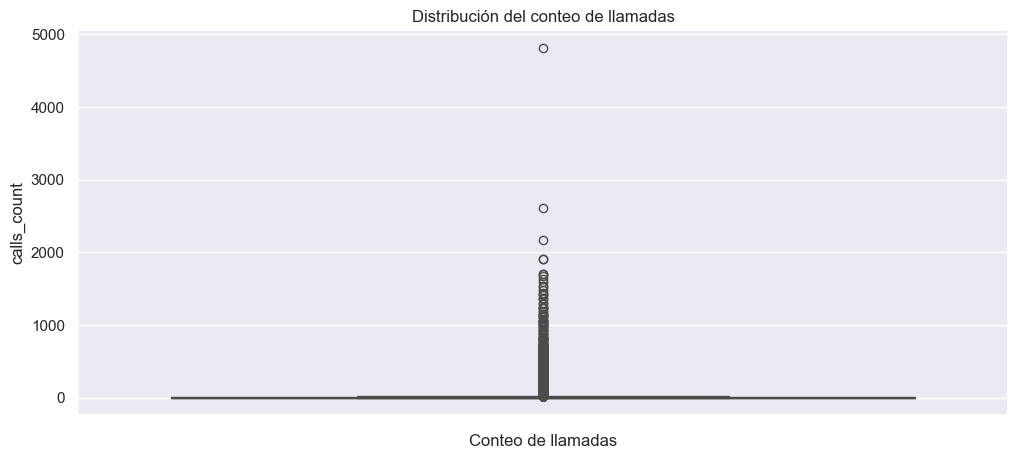

In [12]:
#### Crear gr√°ficas de distribuci√≥n del conteo de llamadas

# Establecer estilo general
sns.set(style='darkgrid')

# Gr√°fico de distribuci√≥n del conteo de llamadas
plt.figure(figsize=(12, 5))
sns.boxplot(calls['calls_count'])
plt.title("Distribuci√≥n del conteo de llamadas")
plt.xlabel("Conteo de llamadas")

plt.show()

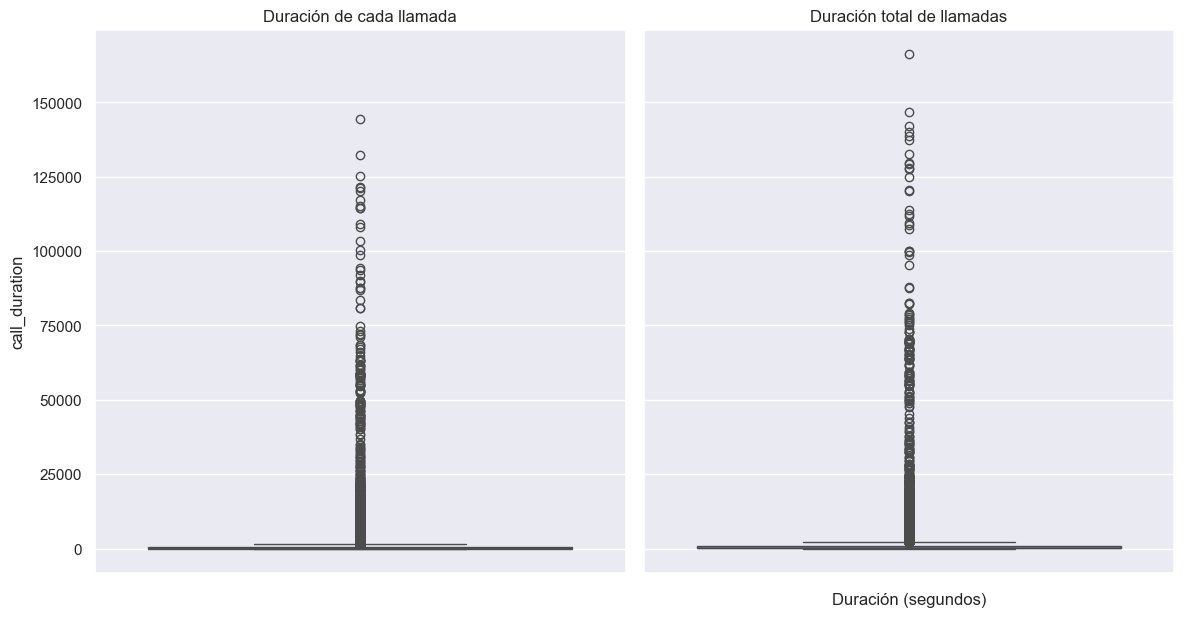

In [13]:
#### Crear boxplots para observar la distribuci√≥n de la duraci√≥n de las llamadas

# Creamos los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # 1 fila, 2 columnas

# Boxplot de la duraci√≥n de las llamadas
sns.boxplot(data=calls['call_duration'], ax=axes[0])
axes[0].set_title('Duraci√≥n de cada llamada')

# Boxplot de la duraci√≥n total de las llamadas
sns.boxplot(data=calls['total_call_duration'], ax=axes[1])
axes[1].set_title('Duraci√≥n total de llamadas')

# Mostrar los gr√°ficos
plt.tight_layout()
plt.xlabel("Duraci√≥n (segundos)")
plt.show()

    En los el gr√°fico de distribuci√≥n del conteo de llamadas, podemos observar que la mayor√≠a de los clientes tienen un conteo de llamadas bajo (el 75% de los usuarios tienen un conteo menor a 12), con algunos clientes que tienen un conteo significativamente m√°s alto. Esto podr√≠a indicar que algunos clientes son realmente activos, aunque quiz√°s sea un poco temprano para inferir posibles causas.

    Los boxplots referentes a la duraci√≥n de las llamadas muestran un patr√≥n similar: el 75% de las llamadas est√° por debajo de los 600 segundos mientras en duraci√≥n total el n√∫mero es 902. Hay una gran cantidad de registros an√≥malos que deber√°n tratarse a lo largo del trabajo de analisis. 

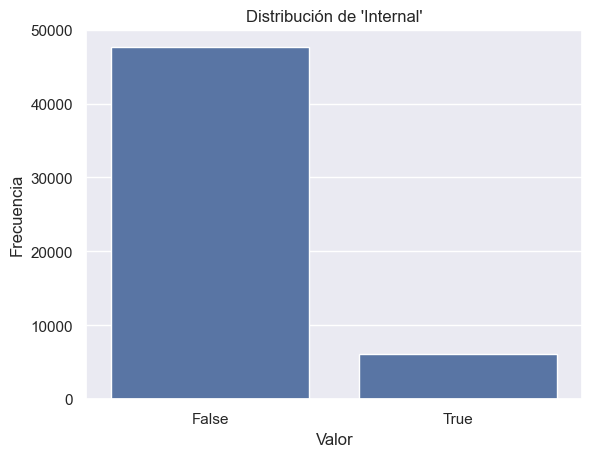

In [14]:
#### Crear gr√°fica de la distribuci√≥n de la columna 'internal'

# Distribuci√≥n de la columna 'internal'
sns.countplot(data=calls, x='internal')
plt.title("Distribuci√≥n de 'Internal'")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.show()

    De acuerdo con el √∫ltimo gr√°fico de barras, la gran mayor√≠a de llamadas son externas. Solamente hay dos respuestas posibles al ser una columna booleana.

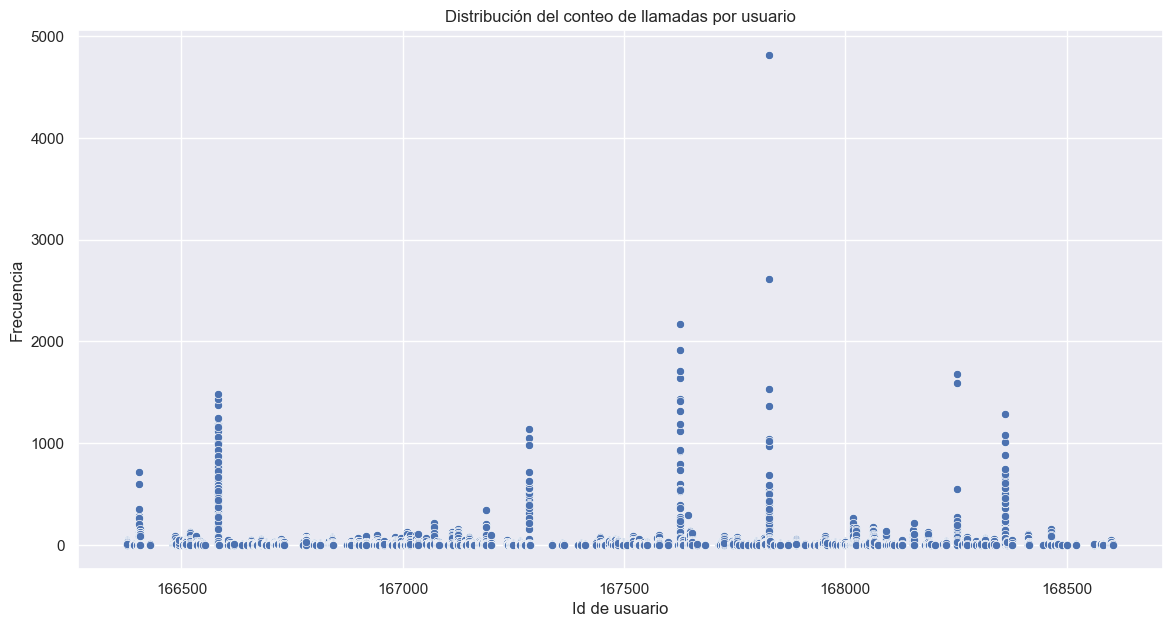

In [15]:
#### Crear gr√°fica de la distribuci√≥n del conteo de llamadas por usuario

# Definir tama√±o del gr√°fico
plt.figure(figsize=(14, 7))

# Distribuci√≥n de 'calls_count'
sns.scatterplot(data=calls, x='user_id', y='calls_count')
plt.title("Distribuci√≥n del conteo de llamadas por usuario")
plt.xlabel("Id de usuario")
plt.ylabel("Frecuencia")
plt.show()

    Para el gr√°fico anterior podemos decir que solamente hay algunos cuantos usuarios an√≥malos que hacen una cantidad de llamadas diarias que podemos considerar no solamente raras sino tambi√©n poco probables. Es posible que se trate de un problema de recolecci√≥n de datos con esos id de usuario, aunque para cuestiones de este an√°lisis simplemente nos limitaremos a recortar los valores extremos para evitar afectar la integridad de los datos y poder as√≠ trazar hip√≥tesis al respecto y sacar conclusiones acerca de dichos resultados. 

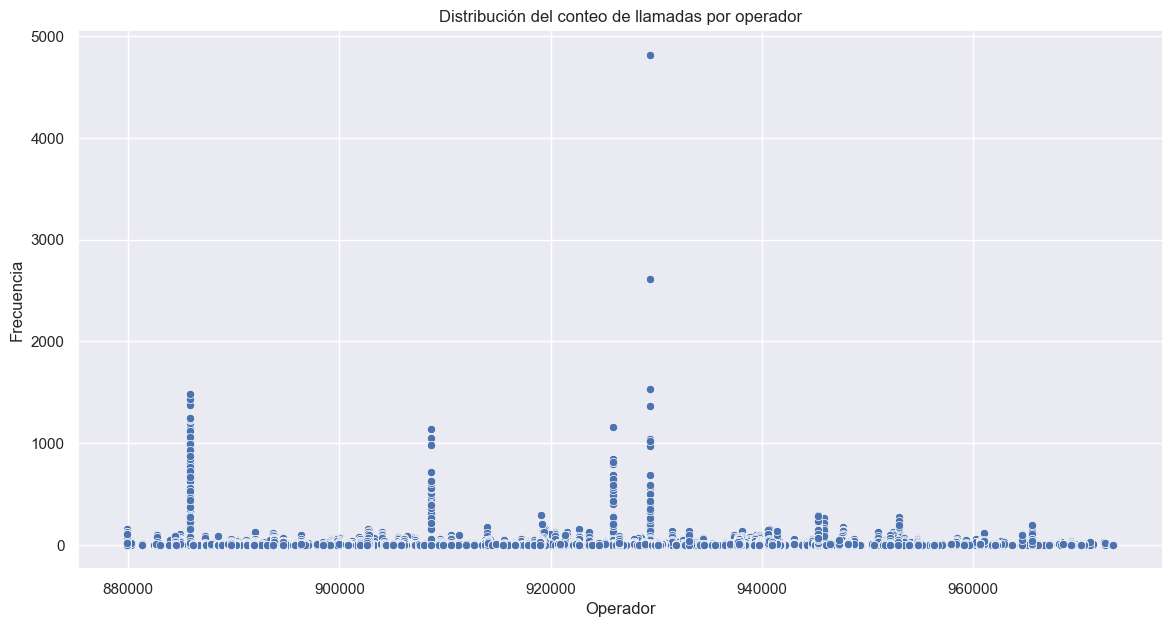

In [16]:
#### Crear gr√°fica de la distribuci√≥n del conteo de llamadas por operador

# Definir tama√±o del gr√°fico
plt.figure(figsize=(14, 7))

# Distribuci√≥n de 'calls_count' por operador
sns.scatterplot(data=calls, x='operator_id', y='calls_count')
plt.title("Distribuci√≥n del conteo de llamadas por operador")
plt.xlabel("Operador")
plt.ylabel("Frecuencia")

plt.show()

    El anterior gr√°fico nos muestra que hay ciertos operadores que tienen un n√∫mero anormalmente alto de llamadas en un solo d√≠a. Esto m√°s all√° de ciertos empleados "super eficientes" nos indica posibles duplicados o errores en los datos que habr√° que corregir (al igual que en el n√∫mero de llamadas por usuario).

#### Observaciones de los estad√≠sticos descriptivos del df Calls:

- Las columnas `calls_count`, `call_duration` y `total_call_duration` presentan valores m√°ximos considerablemente altos en comparaci√≥n con sus medias y medianas, lo que indica la presencia de valores at√≠picos (outliers).
- La mayor√≠a de los registros tienen un conteo de llamadas bajo (el 75% est√° por debajo de 12 llamadas), pero existen algunos usuarios y operadores con conteos anormalmente altos, posiblemente por errores de captura o casos excepcionales.
- En cuanto a la duraci√≥n de las llamadas, el 75% de los registros tiene una duraci√≥n menor a 600 segundos, pero existen llamadas con duraciones extremadamente largas (m√°s de 10,000 segundos), lo que tambi√©n sugiere outliers.
- La variable `internal` muestra que la mayor√≠a de las llamadas son externas, y solo hay dos valores posibles (True/False), aunque existen algunos valores ausentes.
- Se identificaron valores extremos en las m√©tricas principales, por lo que ser√° necesario tratarlos para evitar que distorsionen los an√°lisis posteriores.




#### Clients

In [17]:
# Recordar la estructura del df

clients.head()

user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

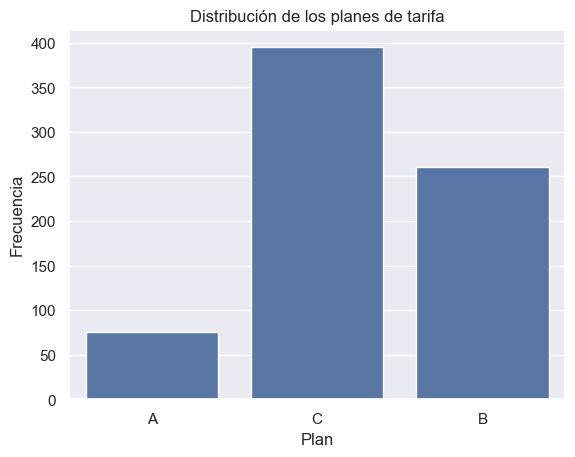

In [18]:
# Distribuci√≥n de los planes de tarifa:

sns.countplot(data=clients, x='tariff_plan')

plt.title("Distribuci√≥n de los planes de tarifa")
plt.xlabel("Plan")
plt.ylabel("Frecuencia")

plt.show()

#### Observaciones de los estad√≠sticos descriptivos del df Clients:

El anterior gr√°fico realmente no aporta mucha informaci√≥n sin tener mayor contexto al respecto de lo que podemos observar, por lo que ser√° necesario profundizar en el an√°lisis temporal de las siguientes etapas.
A "primera vista" solamente podemos se√±alar lo obvio: 
- Tenemos 732 usuarios √∫nicos
- 'A' tiene alrededor de 75 usuarios, 'B' uno poco m√°s de 250 y 'C' casi 400
- Tenemos tambi√©n una fecha de inicio, que ronda el √∫ltimo tercio de a√±o en el 2019

## 2.3 An√°lisis temporal

#### Calls

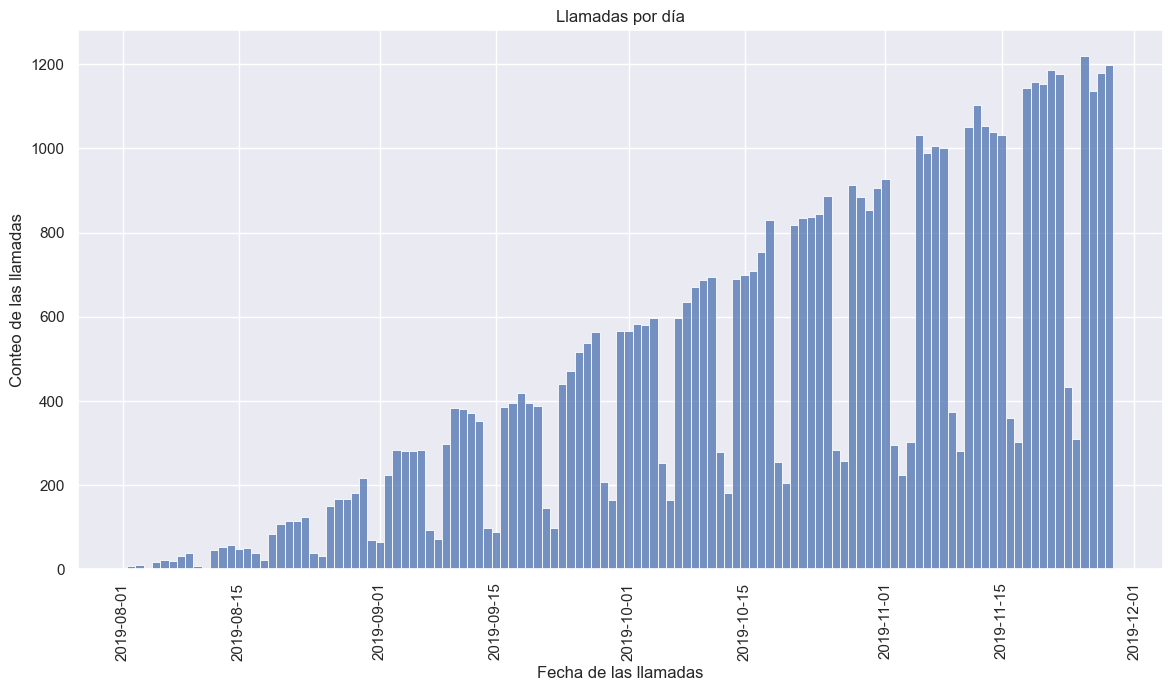

In [19]:
# Convertir la columna date a solamente fecha
calls['date'] = pd.to_datetime(calls['date']).dt.date

# Crear figura y darle tamano
plt.figure(figsize=(14, 7))

# Crear histograma que muestre la distribuci√≥n temporal de los datos de este df
sns.histplot(data=calls, x='date')
plt.title("Llamadas por d√≠a")
plt.xlabel("Fecha de las llamadas")
plt.ylabel("Conteo de las llamadas")
plt.xticks(rotation=90)
plt.show()

#### Observaciones del an√°lisis temporal del df Calls:

En el archivo anterior podemos observar dos patrones: el crecimiento sostenido en el n√∫mero de llamadas desde el comienzo de los datos hasta su final. Lo segundo es que tenemos 5 d√≠as de mayor actividad seguidos de 2 d√≠as en los que la cantidad de llamadas representa solamente un 25%-35% de los anteriores 5. Este tipo de crecimiento constante no indica que o si bien se est√°n colectando cada vez m√°s datos o que el proyecto tiene un ritmo acelerado de crecimiento.


#### Clients

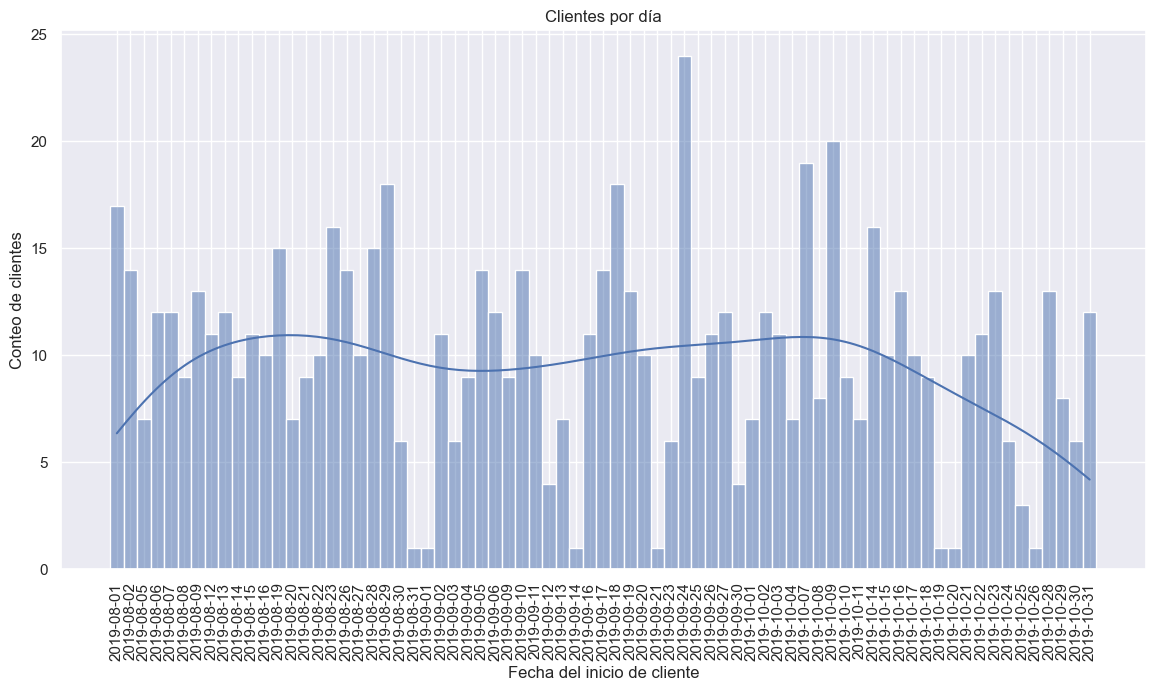

In [20]:
# Crear figura y darle tamano
plt.figure(figsize=(14, 7))

# Crear histograma que muestre la distribuci√≥n temporal de los datos de este df
sns.histplot(
    data=clients.sort_values(by='date_start'),
    x='date_start',
    kde=True
)

plt.title("Clientes por d√≠a")
plt.xlabel("Fecha del inicio de cliente")
plt.ylabel("Conteo de clientes")
plt.xticks(rotation=90)
plt.show()

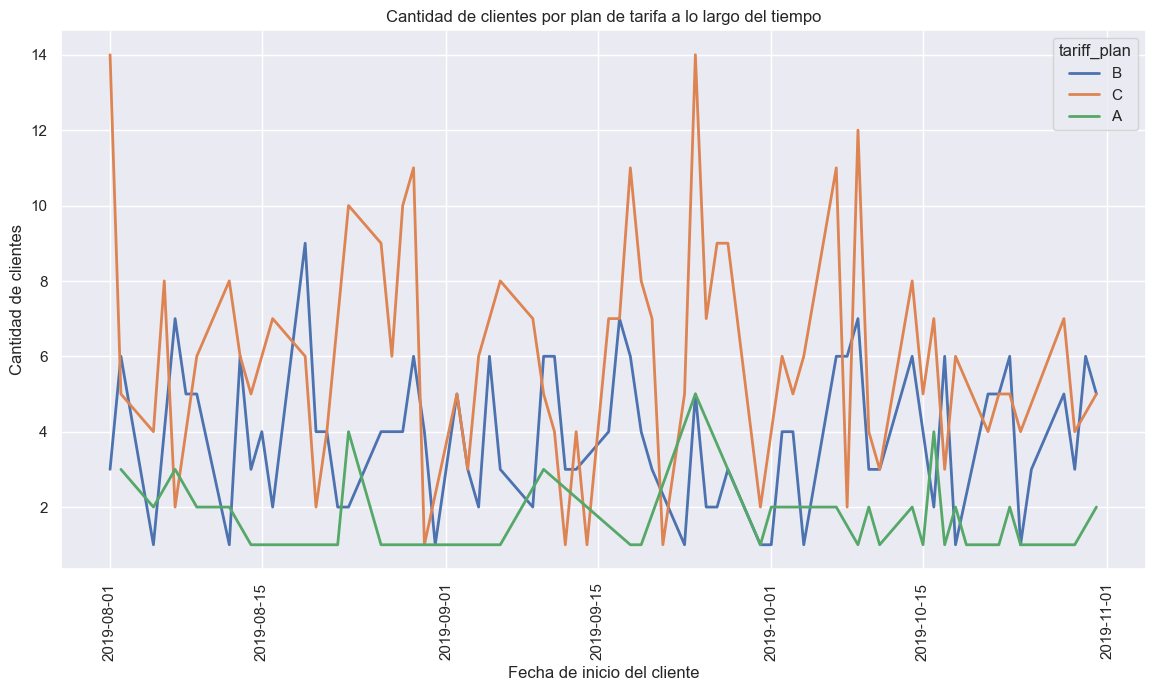

In [21]:
#### Mostrar la cantidad de clientes por plan de tarifa a lo largo del tiempo

# Convertir la columna date_start a tipo fecha y agrupar por fecha y plan de tarifa
clients['date_start'] = pd.to_datetime(clients['date_start']).dt.date
clients_grouped = clients.groupby(['date_start', 'tariff_plan']).size().reset_index(name='count')

# Crear el gr√°fico
plt.figure(figsize=(14, 7))
sns.lineplot(data=clients_grouped,
            x='date_start',
            y='count',
            hue='tariff_plan', 
            linewidth=2, 
            markers='o')

plt.title("Cantidad de clientes por plan de tarifa a lo largo del tiempo")
plt.xlabel("Fecha de inicio del cliente")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=90)
plt.show()

#### Observaciones del an√°lisis temporal del df Clients:

Esta nueva visualizaci√≥n ("Clientes por d√≠a") nos permite responder una de las preguntas/posibilidades reci√©n planteadas: El n√∫mero de clientes no aument√≥ y no muestra ning√∫n patr√≥n claro a primera vista. No es sino mediante el trazado de la l√≠nea de kde(kernel density estimate) que podemos vislumbrar una tendencia a la baja hacia el final de los datos. 

Aqu√≠ podemos empezar a teorizar una hip√≥tesis al tratarse de un servicio de atenci√≥n al cliente: si cada vez hay m√°s llamadas de asistencia, mientras los clientes comienzan a irse es l√≥gico suponer que algo no anda bien con el producto/servicio o la atenci√≥n/soporte mismo que reciben.

Hay que mencionar tambi√©n que no todos los d√≠as se registran nuevos clientes, sino que sigue el mismo patr√≥n observado en el gr√°fico "llamadas por d√≠a" de 5 d√≠as de actividad normal por dos d√≠as de nula o muy bajos registros. Aqu√≠ podemos confirmar lo propuesto anteriormente: de Lunes a Viernes se presentan los eventos de forma regular y es solamente los fines de semana cuando estos cesan o disminuyen considerablemente.

Respecto al segundo gr√°fico, podemos decir que no existe una tendencia clara en ninguna de las 3 tarifas sino una constante fluctuaci√≥n dentro de un rango particular para cada uno de los planes.



## 2.4  Mejorar la calidad de los datos


#### Calls

Recordemos las anomal√≠as detectadas en el an√°lisis exploratorio de datos y en las cuales nos enfocaremos para preparar este dataset:
- La columna 'internal', aparece como tipo object, sin embargo las informaci√≥n que posee muestra una respuesta booleana
- La columna 'date' no aparece como formato datetime
- La columna 'internal' tiene 118 valores ausentes
- La columna 'operator_id' tiene 7172 valores ausentes
- Existen valores extremos en las columnas 'calls_count', 'call_duration' y 'total_call_duration' 

### 2.4.1. Remoci√≥n de duplicados 

In [22]:
#### Remover duplicados

# Mostrar el n√∫mero de filas y columnas del df calls
print(f"N√∫mero de filas y columnas en el df calls: {calls.shape}")

calls = calls.drop_duplicates().reset_index(drop=True)

# Mostrar el n√∫mero de filas y columnas del df calls despues de eliminar duplicados
print(f"N√∫mero de filas y columnas en el df calls despu√©s de eliminar duplicados: {calls.shape}")

# Verificar si hay duplicados
print(f"¬øHay duplicados en el df calls? {calls.duplicated().any()}")

N√∫mero de filas y columnas en el df calls: (53902, 9)
N√∫mero de filas y columnas en el df calls despu√©s de eliminar duplicados: (49002, 9)
¬øHay duplicados en el df calls? False


### 2.4.2. Detecci√≥n y tratamiento de valores ausentes    


In [23]:
##### Tratar los valores ausentes en la columna 'internal'

### Verificar si 'user_id' es siempre el mismo para el mismo operador cuando el 'operator_id' no esta ausente.
operator_filtered = calls[calls['operator_id'].notna()] # Filtrar las filas donde 'operator_id' no es nulo

# Verificar si 'user_id' es siempre el mismo para el mismo operador
multiple_operators = 0  # contador para usuarios con m√∫ltiples operadores

# Agrupar por 'user_id' y 'operator_id' y contar los valores √∫nicos de 'operator_id'
for user_id, group in operator_filtered.groupby('user_id'):
    if group['operator_id'].nunique() > 1:
        multiple_operators += 1 # Incrementar el contador de usuarios con m√∫ltiples operadores
print(f"Existen {multiple_operators} usuarios con m√∫ltiples operadores")


Existen 183 usuarios con m√∫ltiples operadores


    Descartando la teor√≠a de tener un operador √∫nico para cada usuario, no hay una manera discernible de obtener los valores ausentes para esta columna. Conocer el operador de cada evento es fundamental ya que nuestro an√°lisis esta enfocado en saber las m√©tricas de cada uno de ellos. La mejor opci√≥n para tratar esas filas es removerlas del dataset para as√≠ poder realizar las pruebas necesarias sin mayores afectaciones.


In [24]:
# Remover las filas con 'operator_id' ausente
calls = calls[calls['operator_id'].notna()]

In [ ]:
#### Tratar los valores ausentes en la columna 'internal'

### Verificar si 'internal' es siempre el mismo para la misma direcci√≥n de llamada

# Filtrar las filas donde 'internal' es nan
internal_nan = calls[calls['internal'].isna()]

# Verificar el n√∫mero de valores √∫nicos de las columnas cuando 'internal' es nulo
internal_nan.nunique()

user_id                30
date                   36
direction               1
internal                0
operator_id            41
is_missed_call          2
calls_count             3
call_duration          49
total_call_duration    51
dtype: int64

    Podemos observar que para las filas en las cuales 'internal' es nan, solamente tenemos un tipo de direcci√≥n. Ahora es necesario verificar cu√°l es y si en el df original, las llamadas con esa direcci√≥n pueden darnos la informaci√≥n acerca de los valores ausentes.   

In [27]:
# Comprobar el valor de 'direction' en los registros con 'internal' nulo
print("Valores de 'direction' cuando 'internal' es nulo:",  internal_nan['direction'].unique())

# Comprobar si el valor de 'internal' en el dataframe original duando la direcci√≥n es 'in'  
print("Valor de internal en el df 'calls' cuando la direcci√≥n es 'in'",
       calls[calls['direction'] == 'in']['internal'].unique())


Valores de 'direction' cuando 'internal' es nulo: ['in']
Valor de internal en el df 'calls' cuando la direcci√≥n es 'in' [False True nan]



    En este caso la comprobaci√≥n realizada en la celda anterior nos dice que aunque en todas las instancias en las cuales 'internal calls' es nulo, la columna 'direction' == 'in', pero esto no significa que eso sea aplicable para el df en general (en las llamadas con direcci√≥n entrante {'direction' == 'in'}, la columna 'internal' todav√≠a puede tener cualquier valor: True/False/Na). 
    Por lo tanto, para mantener la integridad de los datos, es necesario remover las filas que presentan NaNs, aunque cabe mencionar que en esta ocasi√≥n el impacto es m√≠nimo al representar un porcentaje muy bajo del largo del df.

In [31]:
##### Hacer los ajustes restantes en los tipos de datos del df:

# Descartar los NaNs de la columna 'internal'
calls = calls[calls['internal'].notna()]

# Transformar la columna 'date' a tipo datetime
calls['date'] = pd.to_datetime(calls['date'])

# Transformar la columna 'internal' a tipo booleano
calls['internal'] = calls['internal'].astype(bool)

In [32]:
# Comprobar la informaci√≥n del dataframe 'calls' despu√©s de los cambios
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41491 entries, 1 to 49000
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              41491 non-null  int64         
 1   date                 41491 non-null  datetime64[ns]
 2   direction            41491 non-null  object        
 3   internal             41491 non-null  bool          
 4   operator_id          41491 non-null  float64       
 5   is_missed_call       41491 non-null  bool          
 6   calls_count          41491 non-null  int64         
 7   call_duration        41491 non-null  int64         
 8   total_call_duration  41491 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.6+ MB


### 2.4.3. Correcci√≥n de valores extremos

In [44]:
##### Corregir los valores extremos en las columnas 'calls_count', 'call_duration' y 'total_call_duration'

# Hacer un agrupamiento para la columna 'calls_count' por d√≠a y verificar si existen valores extremos
calls_per_day = calls.groupby(['user_id', 'date'])['calls_count'].sum().reset_index()

# Calcular las estad√≠sticas descriptivas de la columna 'calls_count' agrupada por d√≠a
calls_per_day.describe()

user_id                           date  calls_count
count    8586.000000                           8586  8586.000000
mean   167213.519800  2019-10-20 05:42:58.616352256    62.569765
min    166377.000000            2019-08-02 00:00:00     1.000000
25%    166782.000000            2019-10-01 00:00:00     3.000000
50%    167109.000000            2019-10-24 00:00:00    12.000000
75%    167633.000000            2019-11-12 00:00:00    49.000000
max    168606.000000            2019-11-28 00:00:00  4425.000000
std       547.372783                            NaN   209.923919

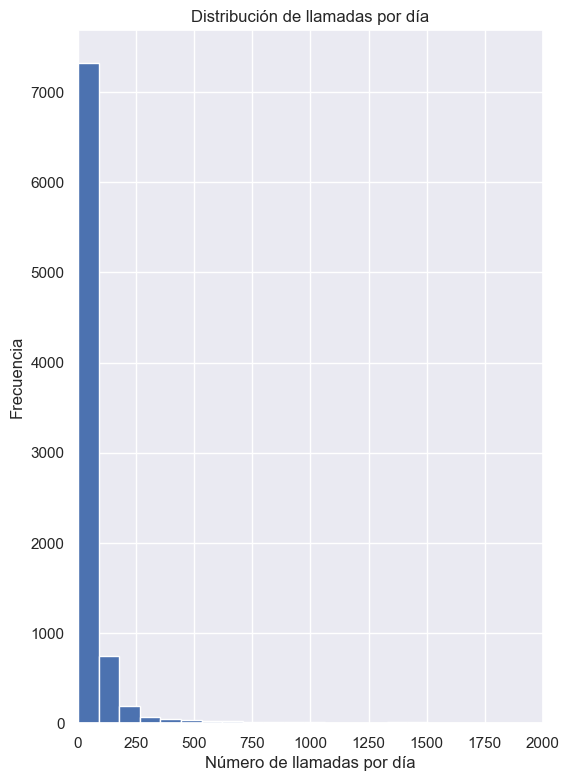

In [45]:
#### Trazar un histograma para visualizar la distribuci√≥n de 'calls_count' por usuario
calls_per_day['calls_count'].hist(
    bins=50, 
    figsize=(6, 9))

# Etiquetas de los ejes, valores y t√≠tulo
plt.xlabel('N√∫mero de llamadas por d√≠a')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de llamadas por d√≠a')
plt.xlim(0, 2000)  # Limitar el eje x para enfocarse en la mayor√≠a de los datos

plt.show()

    Podemos confirmar que existe una anomal√≠a en los datos ya que el anterior histograma nos hace ver claramente que el n√∫mero de llamadas por d√≠a deja de ser visible en el bin que acumula la zona de las 400. Hay que encontrar entonces nuestros percentiles donde este n√∫mero se dispara para as√≠ limitar nuestros datos sin perder integridad en ellos.

In [46]:
# Calcular percentiles para identificar valores extremos
percentiles = np.percentile(calls_per_day['calls_count'], [0, 25, 50, 75, 90, 95, 99, 100])

# Mostrar los percentiles calculados
print('Los percentiles 0 25 50 75 90 95 99 100 de la columna "calls_count" son: \n', percentiles.astype(int))

Los percentiles 0 25 50 75 90 95 99 100 de la columna "calls_count" son: 
 [   1    3   12   49  124  203  959 4425]


In [47]:
# Filtrar los datos para mostrar solo aquellos d√≠as con m√°s de 500 llamadas
print(calls_per_day[calls_per_day['calls_count'] > 500].reset_index(drop=True))

# Calcular el porcentaje de d√≠as con m√°s de 500 llamadas
percentile_500 = len(calls_per_day[calls_per_day['calls_count'] > 500]) / len(calls_per_day) * 100

# Mostrar el percentil que representan los valores filtrados
print("\n El percentil que representa el valor de 500 llamadas por d√≠a es:", 
        percentile_500)

     user_id       date  calls_count
0     166405 2019-11-18          537
1     166582 2019-08-19          644
2     166582 2019-08-20          517
3     166582 2019-08-21          688
4     166582 2019-08-22          556
..       ...        ...          ...
187   168361 2019-11-24         1454
188   168361 2019-11-25         1478
189   168361 2019-11-26         2030
190   168361 2019-11-27         1694
191   168361 2019-11-28         1798

[192 rows x 3 columns]

 El percentil que representa el valor de 500 llamadas por d√≠a es: 2.2361984626135567


#### Comentario sobre valores extremos en llamadas por d√≠a:

En este caso, el percentil 97 representa un valor de 500 llamadas por d√≠a, lo que indica que menos del 0.03% de los d√≠as, un usuario realiza m√°s de 500 llamadas. Por esta raz√≥n haremos el corte en este punto, evitando afectar la integridad del dataframe al eliminar solamente los 258 valores del extremo superior del rango de la columna 'calls_count'.  

In [48]:
#### Eliminar los valores extremos en la columna 'calls_count'

# Mostrar el n√∫mero de filas y columnas del df calls
print(f"N√∫mero de filas en el df calls: {len(calls)}")

# Filtrar los datos para mostrar solo aquellos usuarios con menos de 500 llamadas por d√≠a
calls = calls[calls['calls_count'] < 500]

# Mostrar el n√∫mero de filas y columnas del df calls despu√©s de eliminar los valores extremos
print(f"N√∫mero de filas en el df calls despu√©s de eliminar los valores extremos: {len(calls)}")

N√∫mero de filas en el df calls: 40940
N√∫mero de filas en el df calls despu√©s de eliminar los valores extremos: 40940


In [49]:
##### Corregir los valores extremos en la columna 'call_duration'

# Verificar si hay valores extremos en la columna 'call_duration'
calls['call_duration'].describe()

count    40940.000000
mean       707.685613
std       1397.416942
min          0.000000
25%          0.000000
50%        100.000000
75%        726.000000
max       9994.000000
Name: call_duration, dtype: float64

In [50]:
# Obtener los percentiles para la columna 'call_duration'
print("Los percentiles 0, 25, 50, 75, 90, 95, 99 y 100 de la columna 'call_duration' son: \n",
        np.percentile(calls['call_duration'], [0, 25, 50, 75, 90, 95, 99, 100]).astype(int))

Los percentiles 0, 25, 50, 75, 90, 95, 99 y 100 de la columna 'call_duration' son: 
 [   0    0  100  726 2193 3564 7209 9994]


In [51]:
# Filtrar los datos para mostrar solo aquellos d√≠as con m√°s de 1000 segundos de duraci√≥n de llamada
calls_filtered = calls[calls['call_duration'] < 10000]

print("El percentil que representa el valor de 10000 segundos de duraci√≥n de llamada es:", 
        len(calls_filtered) / len(calls) * 100, "\n")

print(f"N√∫mero de llamadas de m√°s de 10000 segundos de duraci√≥n: {len(calls) - len(calls_filtered)}")

El percentil que representa el valor de 10000 segundos de duraci√≥n de llamada es: 100.0 

N√∫mero de llamadas de m√°s de 10000 segundos de duraci√≥n: 0


#### Comentario sobre los valores extremos en 'call_duration':

Para nuestra columna 'call_duration', el percentil 99 representa un valor de 10000 segundos, lo que indica que menos del 0.01% de las llamadas tienen una duraci√≥n mayor a este valor. Al filtrar los valores extremos de esta columna, evitamos degradar la completidad del dataframe al eliminar solamente los valores del extremo superior de la columna 'call_duration'.

In [52]:
# Mostrar el n√∫mero de filas y columnas del df calls
print(f"N√∫mero de filas en el df calls: {len(calls)}")

# Filtrar los datos para mostrar solo aquellos d√≠as con menos de 10000 segundos de duraci√≥n de llamada
calls = calls[calls['call_duration'] < 10000]

# Mostrar el n√∫mero de filas y columnas del df calls despu√©s de eliminar los valores extremos
print(f"N√∫mero de filas en el df calls despu√©s de eliminar los valores extremos: {len(calls)}")

N√∫mero de filas en el df calls: 40940
N√∫mero de filas en el df calls despu√©s de eliminar los valores extremos: 40940


In [53]:
##### Corregir los valores extremos en la columna 'total_call_duration'

# Verificar si hay valores extremos en la columna 'total_call_duration'
#  despu√©s de eliminar los valores extremos en 'call_duration'
calls['total_call_duration'].describe()

count    40940.000000
mean       951.347509
std       1674.281915
min          0.000000
25%         66.000000
50%        280.000000
75%       1043.250000
max      17146.000000
Name: total_call_duration, dtype: float64

In [54]:
# Comprobar los percentiles para la columna 'total_call_duration'
print("Los percentiles 0, 25, 50, 75, 90, 95, 99 y 100 de la columna 'total_call_duration' son: \n",
      np.percentile(calls['total_call_duration'], [0, 25, 50, 75, 90, 95, 99, 100]).astype(int))

Los percentiles 0, 25, 50, 75, 90, 95, 99 y 100 de la columna 'total_call_duration' son: 
 [    0    66   280  1043  2686  4290  8686 17146]


#### Comentario sobre los valores extremos en la columna 'total_call_duration':

Considerando que el valor m√°ximo original para la columna 'total_call_duration' era de 166155, debemos de concluir que los valores actuales no son "extremos" y podemos continuar sin necesidad de hacer ning√∫n otro recorte al dataframe.


#### Clients

In [55]:
# Verificar si existen duplicados en el df clients
print(f"N√∫mero de filas duplicadas en el df clients: {clients.duplicated().sum()}")

N√∫mero de filas duplicadas en el df clients: 0


#### Comentario sobre los valores extremos en el df Clients:

Para el df clients, no hemos encontrado anomal√≠as significativas en sus valores o distribuciones que requieran correcci√≥n.

# 3. Identificaci√≥n de Operadores Ineficaces

## 3.1 C√°lculo de eficiencia en m√©tricas clave

### 3.1.1 Tasa de llamadas perdidas (por operador)

In [56]:
#### Encontrar las metricas clave para identificar operadores ineficaces

# Tasa de llamadas perdidas y tomadas por operador
missed_per_operator = calls[calls['is_missed_call'] == True].groupby('operator_id').size().reset_index(name='missed_calls')
taken_per_operator = calls[calls['is_missed_call'] == False].groupby('operator_id').size().reset_index(name='taken_calls')

# Unir los dataframes de llamadas perdidas y tomadas por operador
operator_efficiency = pd.merge(missed_per_operator, taken_per_operator, on='operator_id', how='outer')

# Rellenar los valores NaN con 0
operator_efficiency.fillna(0, inplace=True)

# Calcular la tasa de llamadas perdidas por operador
operator_efficiency['missed_call_rate'] = np.round(operator_efficiency['missed_calls'] / (
    operator_efficiency['missed_calls'] + operator_efficiency['taken_calls']), 2)

# Convertir las columnas 'operator_id', 'missed_calls' y 'taken_calls' a tipo int
operator_efficiency['operator_id'] = operator_efficiency['operator_id'].astype(int)
operator_efficiency['missed_calls'] = operator_efficiency['missed_calls'].astype(int)
operator_efficiency['taken_calls'] = operator_efficiency['taken_calls'].astype(int) 

# Mostrar el dataframe con la tasa de llamadas perdidas y tomadas por operador
operator_efficiency

operator_id  missed_calls  taken_calls  missed_call_rate
0          879896            47           69              0.41
1          879898            89          137              0.39
2          880020             6           14              0.30
3          880022            29           41              0.41
4          880026            87           95              0.48
...           ...           ...          ...               ...
1087       972410             2            2              0.50
1088       972412             2            3              0.40
1089       972460             3            4              0.43
1090       973120             1            1              0.50
1091       973286             0            1              0.00

[1092 rows x 4 columns]

Text(0.5, 1.0, 'Tasa de llamadas perdidas por operador')

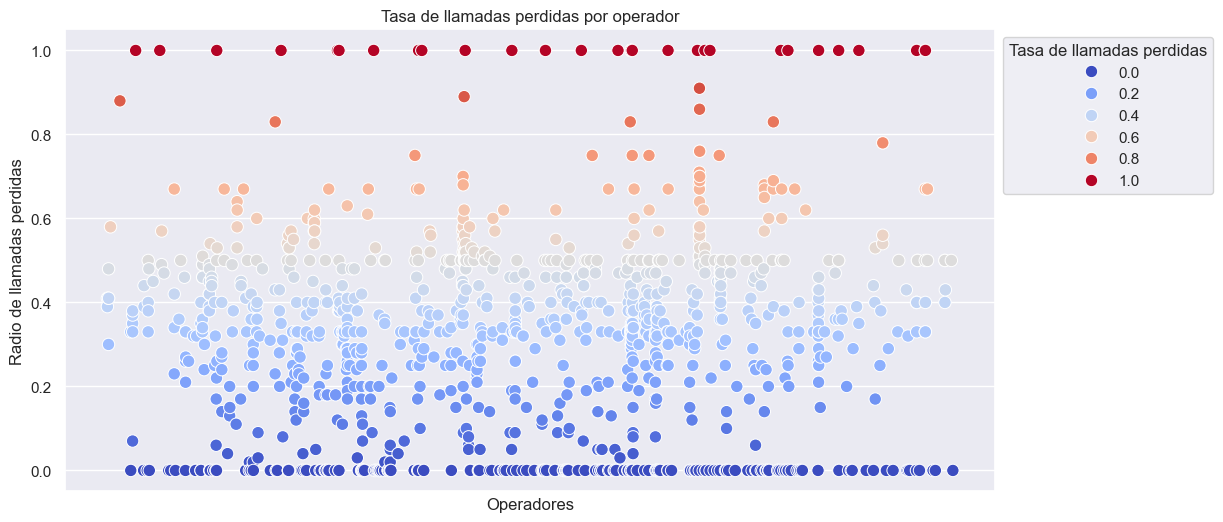

In [57]:
# Graficar la distribuci√≥n de la tasa de llamadas perdidas por operador
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=operator_efficiency,
    x='operator_id',
    y='missed_call_rate',
    hue='missed_call_rate',
    palette='coolwarm',
    s=80
)
# Remover la leyenda y los xticks
plt.legend(title='Tasa de llamadas perdidas', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel("Radio de llamadas perdidas")
plt.xlabel("Operadores")
plt.xticks([])

plt.title("Tasa de llamadas perdidas por operador")

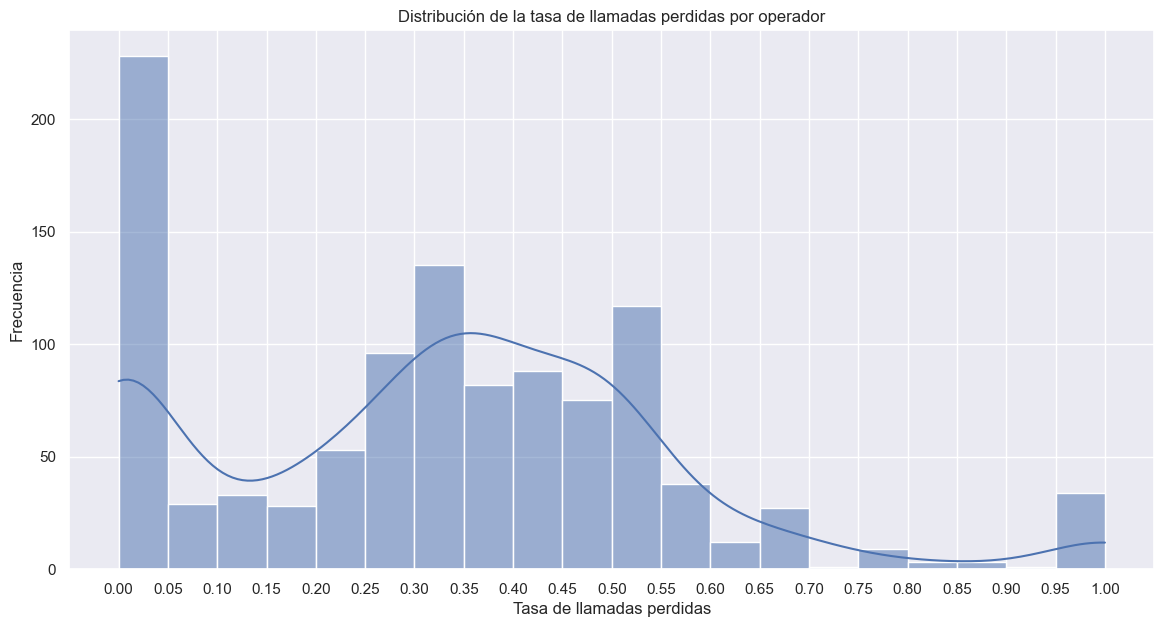

In [58]:
# Graficar la distribuci√≥n de la tasa de llamadas perdidas por operador

# Crear figura y darle tamano
plt.figure(figsize=(14, 7))

sns.histplot(
    data=operator_efficiency,
    x='missed_call_rate',
    bins=20, kde=True
    )

plt.title("Distribuci√≥n de la tasa de llamadas perdidas por operador")
plt.xlabel("Tasa de llamadas perdidas")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0, 1.05, 0.05))  # Ajustar los ticks del eje x

plt.show()

In [59]:
### Mostrar los percentiles de la tasa de llamadas perdidas por operador

# Calcular los percentiles de la tasa de llamadas perdidas por operador
percentiles_missed_calls = np.percentile(operator_efficiency['missed_call_rate'], [25, 50, 75, 80, 85, 90, 95, 99, 100])

# Mostrar los percentiles calculados
print("Los percentiles 25, 50, 75, 80, 85, 90, 95, 99 y 100 de la tasa de llamadas perdidas por operador son: \n",
      percentiles_missed_calls.astype(float))

Los percentiles 25, 50, 75, 80, 85, 90, 95, 99 y 100 de la tasa de llamadas perdidas por operador son: 
 [0.1375 0.33   0.47   0.5    0.5    0.57   0.69   1.     1.    ]


#### Observaciones sobre la tasa de llamadas perdidas por operador:

observarmos que la tasa de llamadas perdidas tiene su punto m√°s elevado en 0 lo cual es muy positivo para la mayor√≠a de agentes. Posteriormente, los datos se distribuyen casi normalmente alrededor del 30 al 50 porciento, lo que indica que una parte importante de los operadores tienen un √°rea de oportunidad importante en cuestiones de eficiencia. Es recomendable por lo tanto realizar un an√°lisis m√°s detallado para identificar las causas de esta elevada tasa de llamadas perdidas (hacer comparativos hist√≥ricos, comprobar est√°ndares en la industria, etc.) 

Con los datos disponibles en nuestros dataset, es necesario verificar si la eficiencia (Tasa de llamadas perdidas) est√° correlacionada con la fecha de inicio del colaborador y de esta manera comprobar o descartar la siguiente hip√≥tesis: Los operadores con menos experiencia tienen una mayor tasa de llamadas perdidas.

### 3.1.2 Tiempo de espera promedio 

Text(0, 0.5, 'Frecuencia')

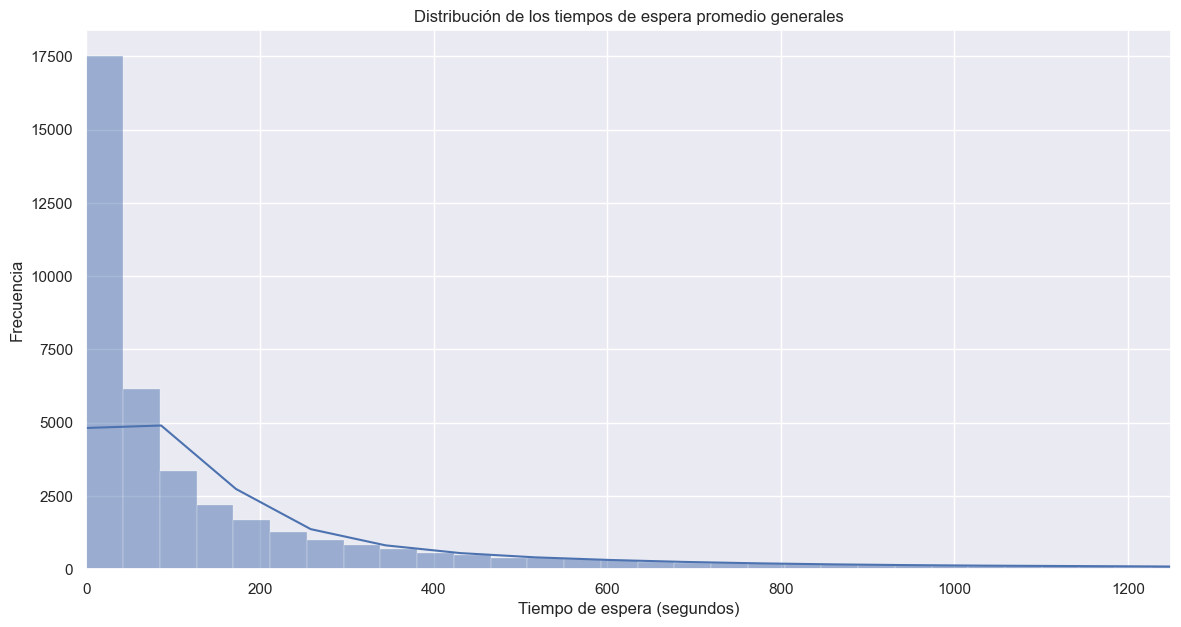

In [60]:
#### Calcular los tiempos de espera promedio por operador

# Agregar columna de tiempo de espera al df 'calls'
calls['wait_time'] = calls['total_call_duration'] - calls['call_duration']

# Graficar la distribuci√≥n de los tiempos de espera promedio generales
plt.figure(figsize=(14, 7))
sns.histplot(
    data=calls,
    x='wait_time',
    kde=True
)

plt.xlim(0, 1250)  # Limitar el eje x para enfocarse en la mayor√≠a de los datos
plt.title("Distribuci√≥n de los tiempos de espera promedio generales")
plt.xlabel("Tiempo de espera (segundos)")
plt.ylabel("Frecuencia")

In [61]:
# Agrupar los datos por operador y calcular el tiempo de espera promedio
wait_time_per_operator = calls.groupby('operator_id')['wait_time'].mean().reset_index()

# Mostrar las estad√≠sticas descriptivas de los tiempos de espera promedio por operador
round(wait_time_per_operator.describe(), 2)

operator_id  wait_time
count      1092.00    1092.00
mean     925517.54     198.68
std       22854.53     399.63
min      879896.00       0.00
25%      906393.50      22.98
50%      925105.00      46.62
75%      944211.50     158.31
max      973286.00    4253.81

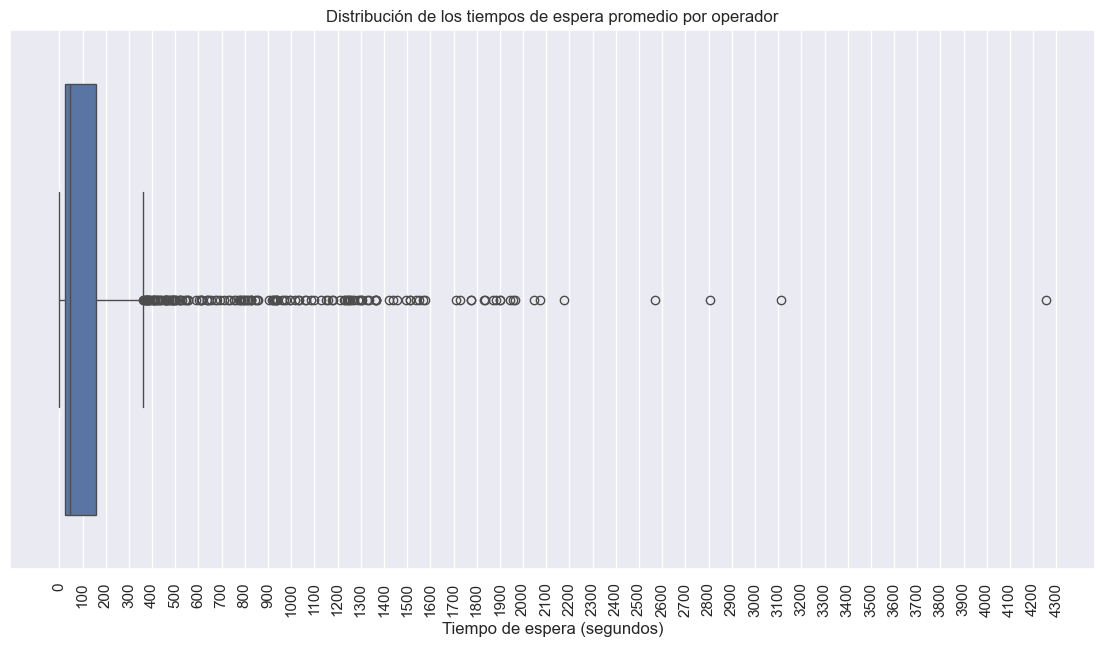

In [62]:
# Graficar la distribuci√≥n de los tiempos de espera promedio por operador
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=wait_time_per_operator,
    x='wait_time',
)

plt.title("Distribuci√≥n de los tiempos de espera promedio por operador")
plt.xlabel("Tiempo de espera (segundos)")
plt.xticks(np.arange(0, 4400, 100), rotation=90)  # Ajustar los ticks del eje x
plt.show()


Text(0.5, 1.0, 'Tiempos de espera promedio por operador')

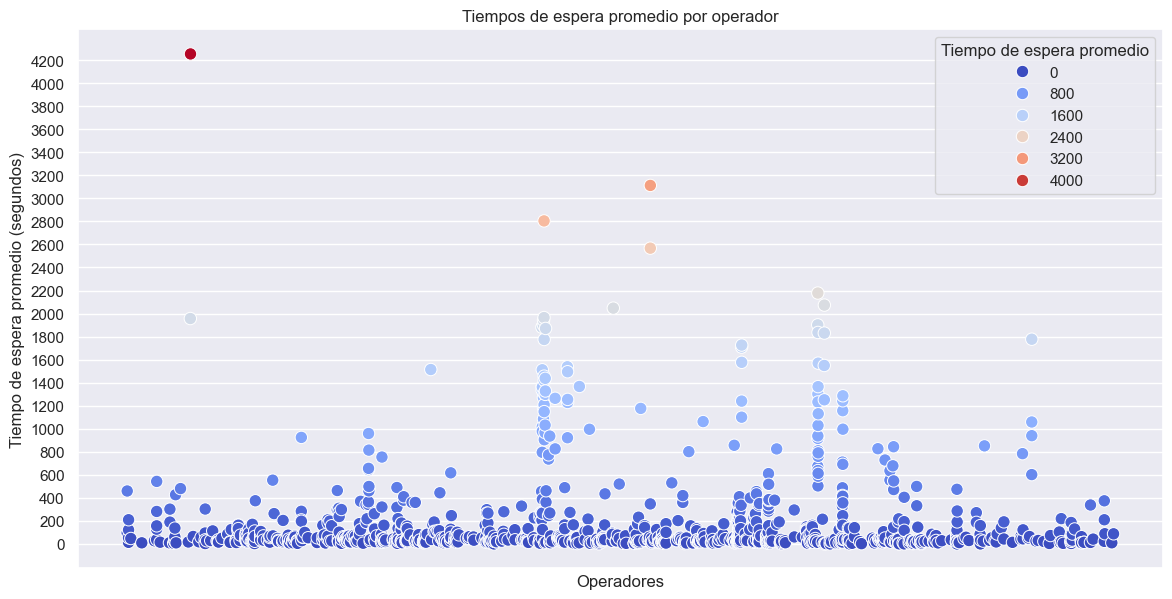

In [63]:
# Grafica de dispersi√≥n de los tiempos de espera promedio por operador
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=wait_time_per_operator,
    x='operator_id',
    y='wait_time',
    hue='wait_time',
    palette='coolwarm',
    s=80
)


plt.xticks([])
plt.yticks(np.arange(0, 4400, 200))  # Ajustar los ticks del eje y
plt.legend(title='Tiempo de espera promedio')
plt.ylabel("Tiempo de espera promedio (segundos)")
plt.xlabel("Operadores")
plt.title("Tiempos de espera promedio por operador")

In [64]:
# Calcular los percentiles de los tiempos de espera promedio por operador
percentiles_wait_time = np.percentile(wait_time_per_operator['wait_time'], [25, 50, 75, 80, 85, 90, 95, 99, 100])

# Mostrar los percentiles calculados
print("Los percentiles 25, 50, 75, 80, 85, 90, 95, 99 y 100 de los tiempos de espera promedio por operador son: \n",
      percentiles_wait_time.astype(int))

Los percentiles 25, 50, 75, 80, 85, 90, 95, 99 y 100 de los tiempos de espera promedio por operador son: 
 [  22   46  158  217  340  529 1091 1900 4253]


#### Observaciones sobre el tiempo de espera promedio por operador:

- La distribuci√≥n general de los tiempos de espera muestra que la mayor√≠a de los operadores mantienen tiempos de espera relativamente bajos, pero existen algunos casos con valores considerablemente altos, lo que indica la presencia de outliers o situaciones at√≠picas.
- El boxplot revela que el 75% de los operadores tienen un tiempo de espera promedio menor a aproximadamente 300 segundos, mientras que el resto presenta valores mucho m√°s elevados, lo que sugiere diferencias importantes en la eficiencia entre operadores.
- El histograma y la gr√°fica de dispersi√≥n refuerzan la idea de que la mayor√≠a de los operadores se agrupan en rangos bajos de tiempo de espera, pero hay un grupo reducido que destaca por tener tiempos de espera significativamente mayores.
- Estos resultados sugieren que, aunque la mayor√≠a de los operadores gestionan adecuadamente el tiempo de espera de las llamadas, existe un subconjunto que podr√≠a requerir atenci√≥n o capacitaci√≥n adicional.

### 3.1.3 Radio de llamadas salientes  

In [65]:
# Calcular las llamadas tomadas por operador
operator_efficiency['taken_calls_rate'] = round(operator_efficiency['taken_calls'] / (
    operator_efficiency['taken_calls'] + operator_efficiency['missed_calls']), 2)

operator_efficiency

operator_id  missed_calls  taken_calls  missed_call_rate  \
0          879896            47           69              0.41   
1          879898            89          137              0.39   
2          880020             6           14              0.30   
3          880022            29           41              0.41   
4          880026            87           95              0.48   
...           ...           ...          ...               ...   
1087       972410             2            2              0.50   
1088       972412             2            3              0.40   
1089       972460             3            4              0.43   
1090       973120             1            1              0.50   
1091       973286             0            1              0.00   

      taken_calls_rate  
0                 0.59  
1                 0.61  
2                 0.70  
3                 0.59  
4                 0.52  
...                ...  
1087              0.50  
1088              0.60  
1089              0.57  
1090              0.50  
1091              1.00  

[1092 rows x 5 columns]

In [66]:
#### Analizar el n√∫mero de llamadas salientes por operador

# Calcular el n√∫mero de llamadas salientes por operador y d√≠a
outgoing_calls = calls[calls['direction'] == 'out'].groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()
outgoing_calls = outgoing_calls.rename(columns={'calls_count': 'outgoing_calls_count'})

# Agregar el total de llamadas diarias por operador
daily_calls_per_operator = calls.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()

# Hacer un merge entre las llamadas salientes y las llamadas diarias por operador
calls_out_summary = pd.merge(
	daily_calls_per_operator,
	outgoing_calls,
	on=['operator_id', 'date'],
	how='left'
)

calls_out_summary['outgoing_calls_count'] = calls_out_summary['outgoing_calls_count'].fillna(0)

calls_out_summary['outgoing_calls_rate'] = round(
    calls_out_summary['outgoing_calls_count'] / calls_out_summary['calls_count'],
    2)
calls_out_summary['outgoing_calls_count'] = calls_out_summary['outgoing_calls_count'].astype(int)

calls_out_summary.sort_values(by='outgoing_calls_rate')

operator_id       date  calls_count  outgoing_calls_count  \
19626     973286.0 2019-11-28            2                     0   
9165      910540.0 2019-10-25            1                     0   
3177      893402.0 2019-11-13            8                     0   
9166      910540.0 2019-10-26            1                     0   
9167      910540.0 2019-10-27            1                     0   
...            ...        ...          ...                   ...   
2120      890422.0 2019-10-23            3                     3   
2119      890422.0 2019-10-22            1                     1   
2118      890422.0 2019-10-21            4                     4   
2152      890582.0 2019-11-08            2                     2   
0         879896.0 2019-08-02           13                    13   

       outgoing_calls_rate  
19626                  0.0  
9165                   0.0  
3177                   0.0  
9166                   0.0  
9167                   0.0  
...                    ...  
2120                   1.0  
2119                   1.0  
2118                   1.0  
2152                   1.0  
0                      1.0  

[19627 rows x 5 columns]

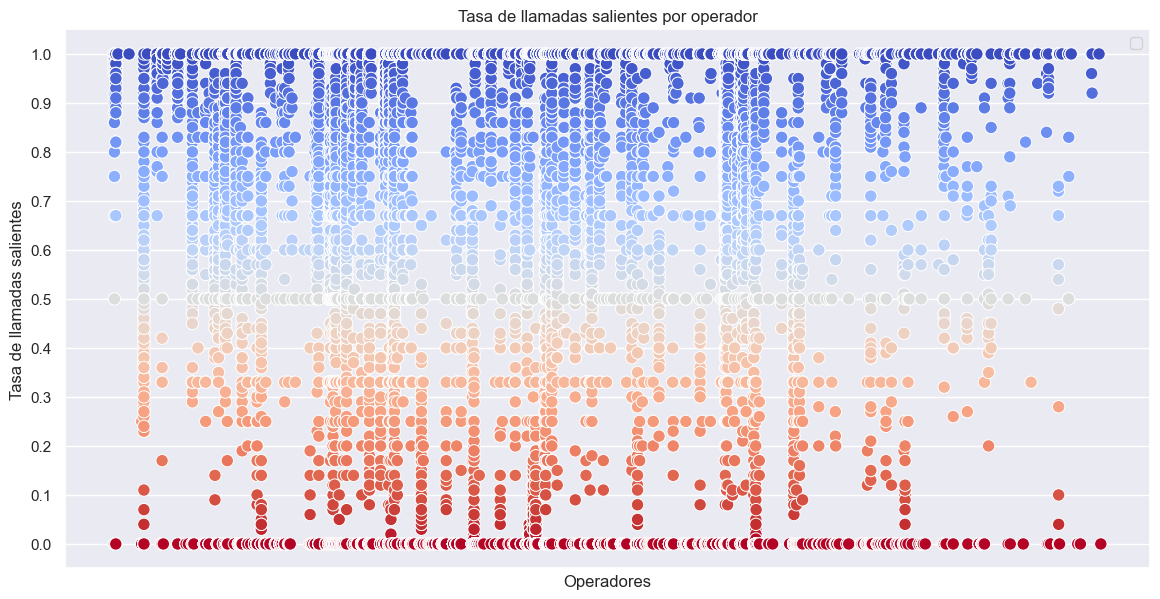

In [67]:
# Grafica la tasa de llamadas salientes por operador por d√≠a
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=calls_out_summary,
    x='operator_id',
    y='outgoing_calls_rate',
    hue='outgoing_calls_rate',
    palette='coolwarm_r',  # "_r" reverses the palette
    s=80
)
# Remover la leyenda, los xticks y agregar t√≠tulo
plt.legend([])
plt.xticks([])
plt.yticks(np.arange(0, 1.05, 0.1)) 
plt.title("Tasa de llamadas salientes por operador")
plt.ylabel("Tasa de llamadas salientes")
plt.xlabel("Operadores")
plt.show()

In [ ]:
#### Calcular los percentiles de la tasa de llamadas salientes por operador

# Obtener el promedio total de llamadas salientes por operador
total_outgoing_calls_per_operator = calls_out_summary.groupby('operator_id')[ 'outgoing_calls_rate'].mean().reset_index()


# Calcular los percentiles de la tasa de llamadas salientes por operador
percentiles_outgoing_calls = np.percentile(total_outgoing_calls_per_operator['outgoing_calls_rate'], [25, 30, 35, 40, 45, 50])

# Mostrar los percentiles de inter√©s
print("Los percentiles 25, 30, 35, 40, 45 y 50 de los tiempos de espera promedio por operador son: \n",
      np.round(percentiles_outgoing_calls, 2))


Los percentiles 25, 30, 35, 40, 45 y 50 de los tiempos de espera promedio por operador son: 
 [0.2  0.37 0.5  0.6  0.69 0.76]


In [69]:
# Comprobar que no exista error en el c√°lculo de los percentiles de la tasa de llamadas salientes por operador

total_outgoing_calls_per_operator['outgoing_calls_rate'].describe()

count    1092.000000
mean        0.620297
std         0.398280
min         0.000000
25%         0.201146
50%         0.763155
75%         1.000000
max         1.000000
Name: outgoing_calls_rate, dtype: float64

## 3.2 Conclusiones sobre las m√©tricas clave

- La tasa de llamadas perdidas por operador var√≠a significativamente, con algunos operadores mostrando tasas muy altas.
- Los tiempos de espera promedio por operador tambi√©n muestran una gran variabilidad, con algunos operadores teniendo tiempos de espera significativamente m√°s altos.
- La tasa de llamadas salientes por operador muestra una densidad m√°s alta en los porcentajes altos, lo que sugiere que muchos de los operadores est√°n activos en la realizaci√≥n de llamadas salientes.
- Al ser la mayor√≠a de las llamadas salientes, podemos deducir que la naturaleza del servicio es m√°s proactiva desde los operadores, por lo que el porcentaje de llamadas salientes toma una relevancia especial en determinar la productividad y eficiencia.
- Estos hallazgos sugieren que hay oportunidades para mejorar la eficiencia operativa y la satisfacci√≥n del cliente al abordar las altas tasas de llamadas perdidas y los tiempos de espera prolongados para las llamadas entrantes.

**Recomendaciones de an√°lisis:**

- Es necesario comprobar si existe una correlaci√≥n entre la fecha de inicio del operador y su eficiencia. 
- Podemos tambi√©n construir cohortes que arrojen luz sobre la existencia de una posible evoluci√≥n o tendencia en cuestiones de eficiencia de los operadores a lo largo del tiempo.



## 3.3 Establecer los umbrales de ineficiencia 

En este punto, el establecer un umbral para definir la ineficiencia puede ser una tarea compleja debido a la falta de referencias respecto a la naturaleza del cliente con el cual trabajamos, as√≠ como sus n√∫meros hist√≥ricos y l√≠nea de negocio, lo cual nos dar√≠a la oportunidad de averiguar est√°ndares en el sector y comprobar en d√≥nde se ubican sus eficiencias para m√©tricas similares.

De este modo, trabajaremos con √∫nicamente la referencia dada en la descripci√≥n del proyecto as√≠ como con la informaci√≥n y observaciones que podemos extraer del dataset. Repasemos mencionado respecto a indicadores de ineficiencia:

    - Si un operador tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes.
    - Si se supone que un operador debe realizar llamadas salientes, tener un n√∫mero reducido de ellas es una se√±al que indica ineficiencia.

Dicho esto, con las distribuciones observadas podemos definir nuestro esquema para determinar si un operador es ineficiente 

    - Bas√°ndonos en el percentil 85 de tiempo de espera: > 340 segundos 
    - Bas√°ndonos en los percentiles de llamadas perdidas entre 85 y 90 (en los cuales cae una gran cantidad de operadores) > 0.55
    - Considerando la alta tasa de llamadas salientes, y la naturaleza proactiva del servicio, establecemos el umbral de ineficiencia en en menos del 20% de llamadas salientes

Ahora bien, al haber 3 criterios para clasificar a un operador como ineficiente, debemos de considerar una segmentaci√≥n. La siguiente clasificaci√≥n es propuesta para lograr una mejor identificaci√≥n de los grados de eficiencia, lo cual aporta informaci√≥n m√°s integral en un sentido operativo, d√°ndole m√°s herramientas a supervisores y encargados para corregir y mejorar sus m√©tricas.

- Si un asociado cae en solamente uno de cualquiera de los 3 criterios para considerar a un operador como ineficiente, se le colocar√° en la categor√≠a de "opportunity_area".
- Si un asociado por otra parte cae en dos de los 3 criterios nombrados con anterioridad, se le debe considerar con una tendencia a la ineficiencia (lo cual requiere una mayo atenci√≥n). Se le denomina a esta categor√≠a "inefficiency_prone"
- Nuestra tercera categor√≠a clasifica a aquellos asociados que son considerados como ineficientes en las tres √°reas medibles. A √©stos los tendremos por "inefficient_operators".

## 3.4 Segmentaci√≥n y clasificaci√≥n de operadores

In [70]:
#### Crear la lista de operadores ineficientes

# Enlistar los operadores ineficientes basados en los tiempos de espera promedio y convertirlos a tipo int
long_wait_operators = wait_time_per_operator[
    wait_time_per_operator['wait_time'] > 340]['operator_id'].tolist()
long_wait_operators = list(map(int, long_wait_operators))

# Enlistar los operadores ineficientes basados en la tasa de llamadas perdidas y convertirlos a tipo int
missed_calls_operators = operator_efficiency[
    operator_efficiency['missed_call_rate'] > 0.55]['operator_id'].tolist()
missed_calls_operators = list(map(int, missed_calls_operators))

# Enlistar los operadores ineficientes basados en la tasa de llamadas salientes y convertirlos a tipo int
low_outgoing_calls = total_outgoing_calls_per_operator[
    total_outgoing_calls_per_operator['outgoing_calls_rate'] < 0.2]['operator_id'].tolist()
low_outgoing_calls = list(map(int, low_outgoing_calls))

# Guardar el n√∫mero de operadores eficientes
efficient_operators = len(set(calls['operator_id'].unique()) 
      - set(long_wait_operators) 
      - set(missed_calls_operators) 
      - set(low_outgoing_calls))

### 3.4.1 Graficar los operadores ineficientes

([], [])

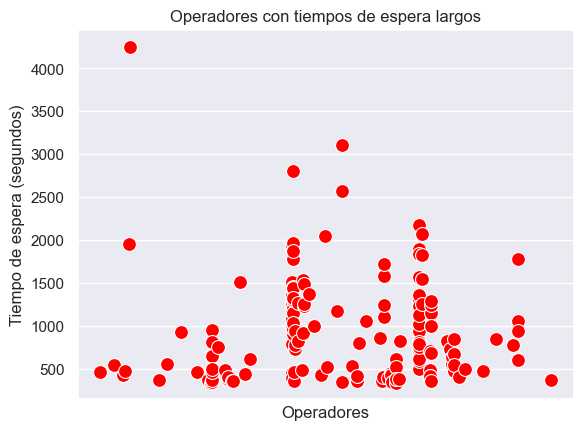

In [ ]:
# Graficar los operadores con tiempos de espera largos
sns.scatterplot(
    data=wait_time_per_operator[wait_time_per_operator['operator_id'].isin(long_wait_operators)],
    x='operator_id',
    y='wait_time',
    color='red',
    s=100
)

plt.title("Operadores con tiempos de espera largos")
plt.xlabel("Operadores")
plt.ylabel("Tiempo de espera (segundos)")
plt.xticks([])

([], [])

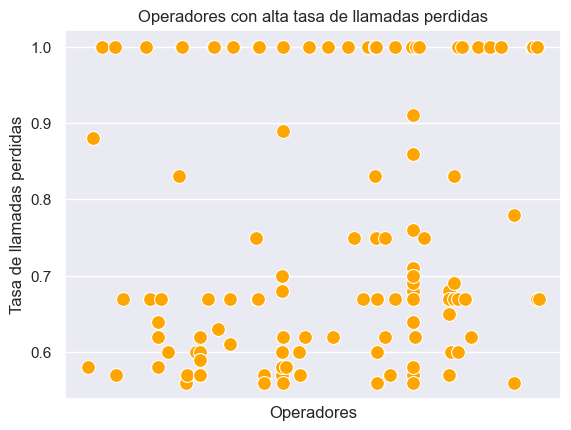

In [72]:
# Graficar los operadores con tasa de llamadas perdidas alta

sns.scatterplot(
    data=operator_efficiency[operator_efficiency['operator_id'].isin(missed_calls_operators)],
    x='operator_id',
    y='missed_call_rate',
    color='orange',
    s=100
)

plt.title("Operadores con alta tasa de llamadas perdidas")
plt.xlabel("Operadores")
plt.ylabel("Tasa de llamadas perdidas")
plt.xticks([])


([], [])

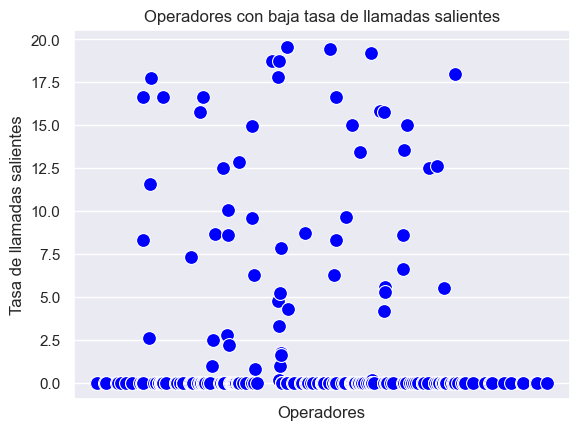

In [73]:
# Graficar los operadores con tasa de llamadas salientes baja

sns.scatterplot(
    data=total_outgoing_calls_per_operator[total_outgoing_calls_per_operator['operator_id'].isin(low_outgoing_calls)],
    x='operator_id',
    y=total_outgoing_calls_per_operator[total_outgoing_calls_per_operator['operator_id'].isin(low_outgoing_calls)]['outgoing_calls_rate'] * 100,
    color='blue',
    s=100
)

plt.title("Operadores con baja tasa de llamadas salientes")
plt.xlabel("Operadores")
plt.ylabel("Tasa de llamadas salientes")
plt.xticks([])

In [75]:
#### Clasificar a los operadores ineficientes

# Crear listas para las distintas categor√≠as de eficiencia
opportunity_area = []
inefficiency_prone = []
inefficient_operators = []
efficient_operators = []

# Evaluar cada operador seg√∫n su presencia en los criterios
for operator in calls['operator_id'].unique():
    criteria_hit = sum([
        operator in long_wait_operators,
        operator in missed_calls_operators,
        operator in low_outgoing_calls
    ])
    
    if criteria_hit == 1:
        opportunity_area.append(operator)
    elif criteria_hit == 2:
        inefficiency_prone.append(operator)
    elif criteria_hit == 3:
        inefficient_operators.append(operator)
    else:
        efficient_operators.append(operator)


# Convertir las listas a tipo int 
opportunity_area = list(map(int, opportunity_area))
inefficiency_prone = list(map(int, inefficiency_prone))
inefficient_operators = list(map(int, inefficient_operators))
efficient_operators = list(map(int, efficient_operators))

In [76]:
# Mostrar el conteo de operadores ineficientes en cada √°rea (√°rea de oportunidad, tendencia a la ineficiencia, ineficientes y eficientes)

print("Conteo de operadores ineficientes en cada √°rea:")
print("Operadores con tiempos de espera largos:", len(long_wait_operators))
print("Operadores con tasa de llamadas perdidas alta:", len(missed_calls_operators))
print("Operadores con tasa de llamadas salientes baja:", len(low_outgoing_calls))
print("Operadores eficientes:", len(efficient_operators))


# Mostrar las listas de operadores ineficientes/eficientes

print("\n Clasificaci√≥n de operadores:")
print(f"- √Årea de oportunidad: {len(opportunity_area)}")
print(f"- Tendencia a la ineficiencia: {len(inefficiency_prone)}")
print(f"- Ineficientes: {len(inefficient_operators)}")
print(f"- Eficientes: {len(efficient_operators)}")

Conteo de operadores ineficientes en cada √°rea:
Operadores con tiempos de espera largos: 165
Operadores con tasa de llamadas perdidas alta: 124
Operadores con tasa de llamadas salientes baja: 268
Operadores eficientes: 588

 Clasificaci√≥n de operadores:
- √Årea de oportunidad: 451
- Tendencia a la ineficiencia: 53
- Ineficientes: 0
- Eficientes: 588


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10656\2346920998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Clasificaci√≥n de los operadores ineficientes/eficientes')

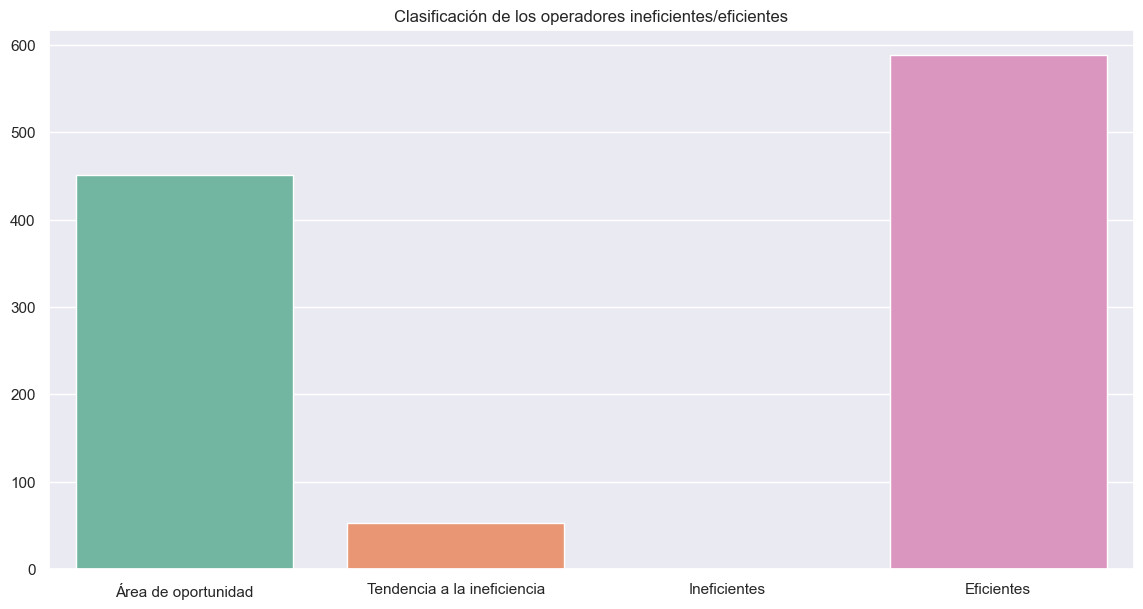

In [77]:
# Graficar la clasificaci√≥n de los operadores ineficientes/eficientes

plt.figure(figsize=(14, 7))
sns.barplot(
    x=['√Årea de oportunidad', 'Tendencia a la ineficiencia', 'Ineficientes', 'Eficientes'],
    y=[len(opportunity_area), len(inefficiency_prone), len(inefficient_operators), len(efficient_operators)],
    palette='Set2'
)

plt.title("Clasificaci√≥n de los operadores ineficientes/eficientes")

### 3.4.2 Conclusiones sobre la clasificaci√≥n de operadores ineficientes y su distribuci√≥n:

Los resultados de la segmentaci√≥n anterior, nos muestra que ninguno de los operadores es completamente ineficiente. M√°s de un 50% del total puede considerarse "eficiente" o por lo menos no caen en ninguno de los criterios para ser considerados ineficientes. 

Tenemos ahora la lista de aquellos quienes tienen problemas con alguno de los criterios de eficiencia (451) y los que se encuentran debajo de las expectativas en dos de ellos(53). 

El siguiente paso en nuestro an√°lisis ser√° comprobar si existe una correlaci√≥n entre esta ineficiencia y la fecha de inicio (antiguedad) del asociado en cuesti√≥n. 

# 4. An√°lisis de relaciones entre variables

Para comenzar a correlacionar la eficiencia de los asociados con su fecha de inicio, tendremos que realizar un an√°lisis de cohortes y medir nuevamente la eficiencia para los distintos grupos. Entonces, podremos determinar si la hip√≥tesis presentada tiene alg√∫n tipo de sustento. 

## 4.1 An√°lisis de cohortes 

In [78]:
#### Agregar una columnas adicionales de clasificaci√≥n y cohorte al df 'calls'

# Agregar una columna de clasificaci√≥n de eficiencia de operadores al df 'calls
calls['operator_classification'] = 'Eficiente'
calls.loc[calls['operator_id'].isin(opportunity_area), 'operator_classification'] = '√Årea de Oportunidad'
calls.loc[calls['operator_id'].isin(inefficiency_prone), 'operator_classification'] = 'Tendencia a la Ineficiencia'
calls.loc[calls['operator_id'].isin(inefficient_operators), 'operator_classification'] = 'Ineficiente'

# Encontrar la fecha de inicio del operador al df 'calls'
operator_start_dates = calls.groupby('operator_id')['date'].min().reset_index()
operator_start_dates = operator_start_dates.rename(columns={'date': 'operator_start_date'})

# Agregar la fecha de inicio del operador al df 'calls'
calls = pd.merge(calls, operator_start_dates, on='operator_id', how='left')

# Convertir la columna 'operator_start_date' a tipo date
calls['operator_start_date'] = pd.to_datetime(calls['operator_start_date']).dt.date

# Mostrar las columnas del df 'calls' para verificar los cambios
print(calls.columns)

Index(['user_id', 'date', 'direction', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration',
       'wait_time', 'operator_classification', 'operator_start_date'],
      dtype='object')


Text(0, 0.5, 'Frecuencia')

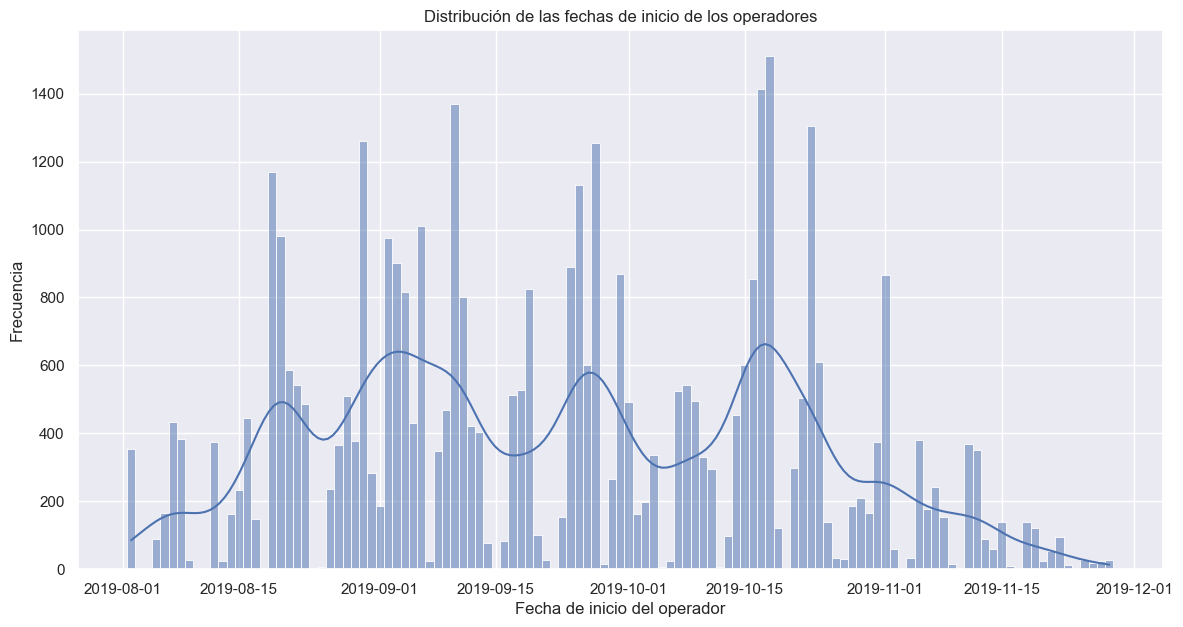

In [79]:
#### Analizar la distribuci√≥n de las fechas de inicio de los operadores

# Crear gr√°fico de barras para la distribuci√≥n de las fechas de inicio de los operadores
plt.figure(figsize=(14, 7))
sns.histplot(
    data=calls,
    x='operator_start_date',
    kde=True
)
plt.title("Distribuci√≥n de las fechas de inicio de los operadores")
plt.xlabel("Fecha de inicio del operador")
plt.ylabel("Frecuencia")

In [80]:
# Contar el n√∫mero de fechas de inicio de operadores
print("\n N√∫mero de fechas de inicio de operadores: \n",
      calls['operator_start_date'].nunique())


 N√∫mero de fechas de inicio de operadores: 
 109


#### Comentario:
Al haber 109 fechas de inicio de operadores, crearemos cohortes con per√≠odos de 14 d√≠as para analizar la evoluci√≥n de los operadores a lo largo del tiempo, lo cual se dividir√° en 8 cohortes aproximadamente y a su vez esto va a "cuadrar" cada grupo con la estacionalidad observada de una semana y tambi√©n facilitar√° la toma de mediciones de eficiencia cada semana para un mejor seguimiento de la evoluci√≥n del desempe√±o.


In [81]:
#### Crear cohortes de 14 d√≠as para el an√°lisis:

# Copiar el df para su manipulaci√≥n
operator_cohorts = calls.copy()

# Convertir columna 'date' a formato fecha
operator_cohorts['date'] = pd.to_datetime(operator_cohorts['date']).dt.date

# Convertir columna 'operator_id' a int
operator_cohorts['operator_id'] = operator_cohorts['operator_id'].astype(int)

# Definir fecha de inicio
start_date = operator_cohorts['operator_start_date'].min()

# Calculate the timedelta in days between operator_start_date and start_date
operator_cohorts['cohort'] = (operator_cohorts['operator_start_date'] - start_date).apply(lambda x: x.days)

# Aumentar en 1 el valor en la columna timedelta para poder hacer la divisi√≥n de 12 d√≠as
operator_cohorts['cohort'] = operator_cohorts['cohort'] + 1

# Hacer la divisi√≥n entre 14 para tener nuestras cohortes organizadas
operator_cohorts['cohort'] = (operator_cohorts['cohort'] // 14).astype(int)

# Agregar una columna de semana para organizar el progreso de las cohortes
operator_cohorts['week'] = operator_cohorts['date'].apply(lambda x: (x - start_date).days // 7)

## 4.2 Evoluci√≥n de m√©tricas por cohorte y semana

In [82]:
#### Agrupar los datos de columna 'direction' por cohorte y semana

# Convertir la columna 'direction' a binario
operator_cohorts['direction'] = operator_cohorts[
    'direction'].map({'in': 0, 'out': 1})

# Convertir la coumna 'is_missed_call' a tipo binario
operator_cohorts['is_missed_call'] = operator_cohorts[
    'is_missed_call'].map({True: 0, False: 1})

# Crear agrupaci√≥n para medir el promedio de direcci√≥n de llamadas por operador y cohorte
operator_cohort_direction_avg = operator_cohorts.groupby(
    ['cohort', 'week'])['direction'].mean().reset_index()  

# Crear una tabla pivote para analizar la evoluci√≥n de las cohortes con el paso de las semanas en llamadas salientes
operator_cohorts_direction_pivot = operator_cohort_direction_avg.pivot_table(
    index='cohort',
    columns='week',
    values='direction',
    aggfunc='mean'
)

In [ ]:
#### Agrupar los datos de columna 'is_missed_call' por cohorte y semana

# Crear agrupaci√≥n para medir el promedio de llamadas perdidas por operador y cohorte
operator_cohort_missed_avg = operator_cohorts.groupby(
    ['cohort', 'week'])['is_missed_call'].mean().reset_index()

# Crear una tabla pivote para analizar la evoluci√≥n de las cohortes con el paso de las semanas en llamadas perdidas
operator_cohorts_missed_pivot = operator_cohort_missed_avg.pivot_table(
    index='cohort',
    columns='week',
    values='is_missed_call',
    aggfunc='mean')

In [84]:
#### Agrupar tiempos de espera promedio por cohorte y semana

# Crear agrupaci√≥n para medir el promedio de tiempos de espera por semana y cohorte
operator_cohort_wait_avg = operator_cohorts.groupby(
    ['cohort', 'week'])['wait_time'].mean().reset_index()

# Crear una tabla pivote para analizar la evoluci√≥n de las cohortes con el paso de las semanas en tiempos de espera
operator_cohorts_wait_pivot = operator_cohort_wait_avg.pivot_table(
    index='cohort',
    columns='week',
    values='wait_time',
    aggfunc='mean'
)

Text(142.25, 0.5, 'Cohorte')

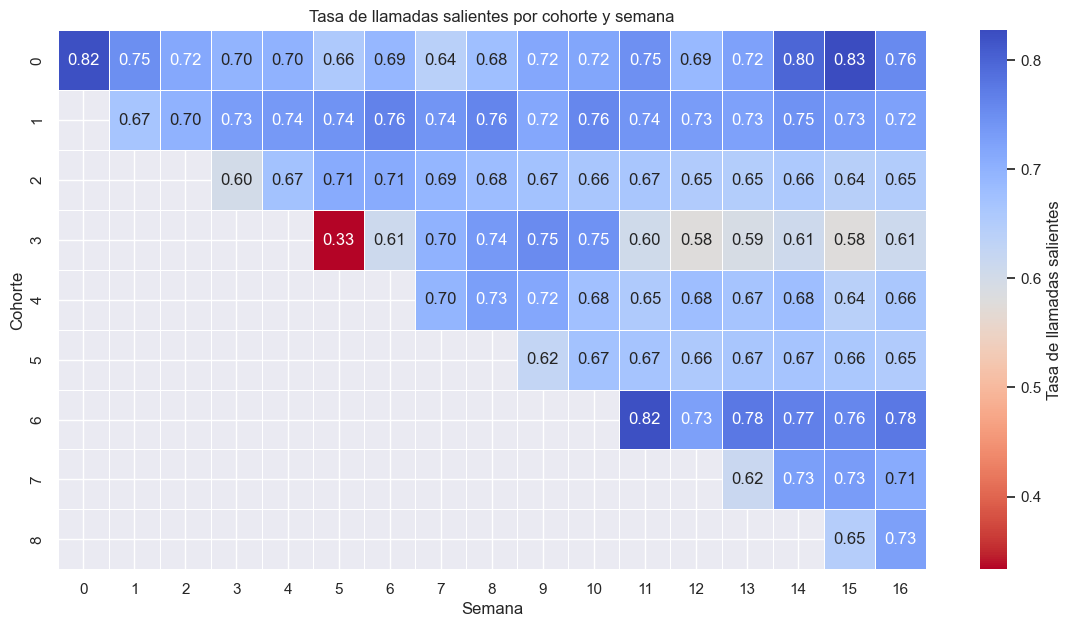

In [85]:
#### Crear heatmaps para visualizar las cohortes y semanas vs las m√©tricas clave

# Crear un heatmap para la tasa de llamadas salientes por cohorte y semana
plt.figure(figsize=(14,7))
sns.heatmap(
    operator_cohorts_direction_pivot,
    annot=True,
    fmt=".2f",
    cmap='coolwarm_r',
    cbar_kws={'label': 'Tasa de llamadas salientes'},
    linewidths=0.5
)

plt.title("Tasa de llamadas salientes por cohorte y semana")
plt.xlabel("Semana")
plt.ylabel("Cohorte")

Text(142.25, 0.5, 'Cohorte')

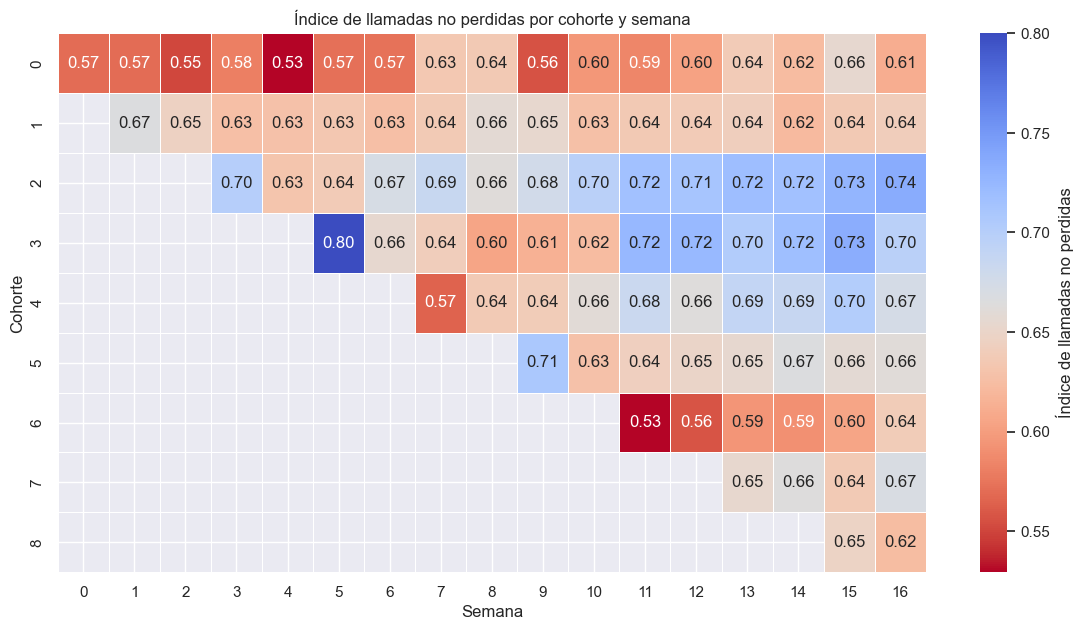

In [86]:
### Graficar la evoluci√≥n de las cohortes con el paso de las semanas en llamadas perdidas
plt.figure(figsize=(14, 7))
sns.heatmap(
    operator_cohorts_missed_pivot,
    annot=True,
    fmt=".2f",
    cmap='coolwarm_r',
    cbar_kws={'label': '√çndice de llamadas no perdidas'},
    linewidths=0.5
)

plt.title("√çndice de llamadas no perdidas por cohorte y semana")
plt.xlabel("Semana")
plt.ylabel("Cohorte")

Text(142.25, 0.5, 'Cohorte')

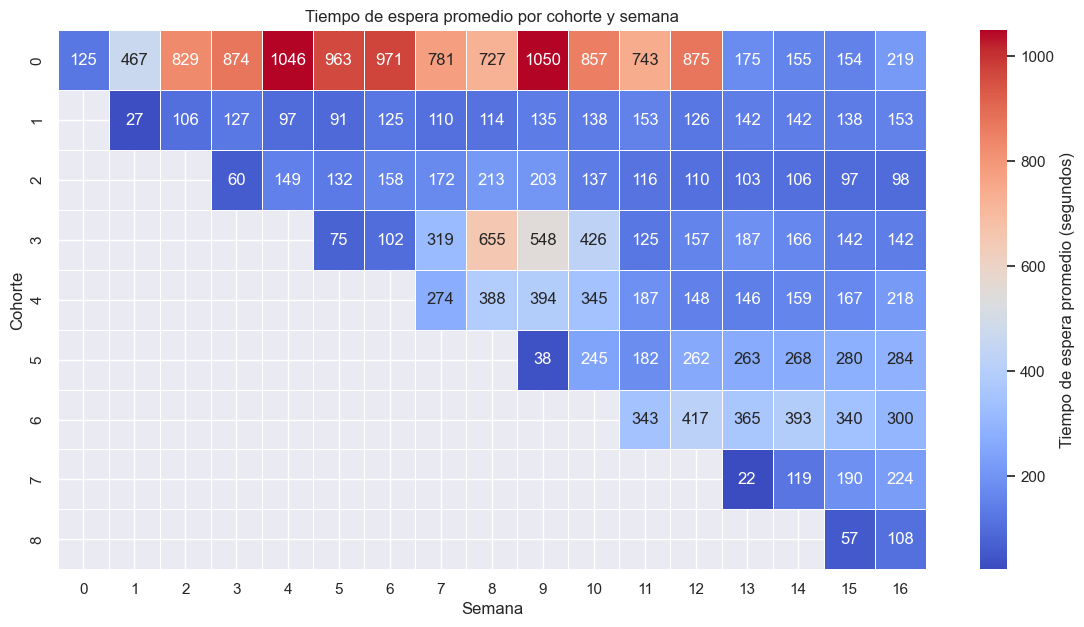

In [87]:
# Crear un heatmap para la tasa de tiempos de espera por cohorte y semana
plt.figure(figsize=(14, 7))
sns.heatmap(
    operator_cohorts_wait_pivot,
    annot=True,
    fmt=".0f",
    cmap='coolwarm',
    cbar_kws={'label': 'Tiempo de espera promedio (segundos)'},
    linewidths=0.5
)

plt.title("Tiempo de espera promedio por cohorte y semana")
plt.xlabel("Semana")
plt.ylabel("Cohorte")

#### Observaciones de las m√©tricas clave por cohorte:
1. La tasa de llamadas salientes por cohorte y semana muestra una tendencia a la mejora leve en la mayor√≠a de las cohortes, lo que indica que los operadores normalmente mejoran en la gesti√≥n de llamadas salientes a lo largo del tiempo.
2. El √≠ndice de llamadas no perdidas por cohorte y semana no muestra una tendencia clara, lo que sugiere que la tasa de llamadas perdidas puede ser inconsistente entre las cohortes y las semanas.
3. El tiempo de espera promedio por cohorte y semana muestra una tendencia al desmejoramiento en la mayor√≠a de las cohortes, lo que es un claro indicador de que esta se trata de una m√©trica la cual no es debidamente gestionada y atendida por parte de la gerencia operativa.

En general, podemos concluir que se observa una diferencia sustancial en la eficiencia de distintas cohortes de operadores, lo que sugiere que se trata no de diferencias aleatorias, sino de fallas en la gesti√≥n interna (capacitaci√≥n, seguimiento, supervisi√≥n) de los grupos de asociados. Aunque no contamos con informaci√≥n de este manejo operativo de los empleados, tenemos los suficientes elementos para probar estad√≠sticamente si existe una diferencia significativa en su desempe√±o dependiendo de su cohorte.

## 4.3 Matriz de correlaci√≥n entre m√©tricas clave

           direction    missed  wait_time
direction   1.000000 -0.685757   0.156701
missed     -0.685757  1.000000  -0.632533
wait_time   0.156701 -0.632533   1.000000


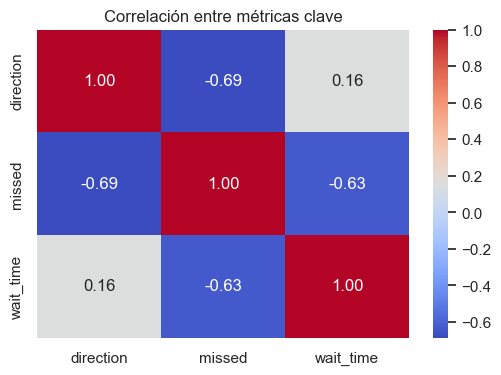

In [88]:
#### Generar matriz de correlaci√≥n para las m√©tricas clave

# Calcular la matriz de correlaci√≥n

# Unir las tres tablas pivote en un solo DataFrame
metrics_combined = pd.DataFrame({
    'direction': operator_cohorts_direction_pivot.stack(),
    'missed': operator_cohorts_missed_pivot.stack(),
    'wait_time': operator_cohorts_wait_pivot.stack()
}).reset_index()

# Calcular la matriz de correlaci√≥n
correlation_matrix = metrics_combined[['direction', 'missed', 'wait_time']].corr()

print(correlation_matrix)

# Visualizar la matriz de correlaci√≥n con un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaci√≥n entre m√©tricas clave')
plt.show()

#### Observaciones sobre la correlaci√≥n entre las m√©tricas:

1. La tasa de llamadas salientes y el √≠ndice de llamadas no perdidas tienen una correlaci√≥n positiva moderada (-0.69), lo que sugiere que a medida que aumenta la tasa de llamadas salientes, tambi√©n tiende a aumentar el √≠ndice de llamadas no perdidas.
2. La tasa de llamadas salientes y el tiempo de espera promedio tienen una correlaci√≥n casi neutral (0.16), lo que indica que no existe una influencia entre estas dos m√©tricas.
3. El √≠ndice de llamadas no perdidas y el tiempo de espera promedio tienen una correlaci√≥n negativa moderada (-0.63), lo que sugiere que a medida que aumenta el √≠ndice de llamadas no perdidas, el tiempo de espera promedio tiende a disminuir.
4. En general, podemos decir que las 3 las m√©tricas clave est√°n ligeramente interrelacionadas, lo que indica que mejorar una de estas puede tener un impacto positivo en las otras (Mejorar en el tiempo de espera debe por tanto ser beneficioso para el n√∫mero de llamadas perdidas y esto a la vez mejorar el √≠ndice de llamadas salientes al estar estas dos √∫ltimas ligadas) 


# 5. Hip√≥tesis y pruebas estad√≠sticas

## 5.1 Elaboraci√≥n de hip√≥tesis:

Bas√°ndonos en las diversas observaciones realizadas hasta este momento, podemos proceder a formular nuestras hip√≥tesis y establecer los par√°metros necesarios para hacer las pruebas estad√≠sticas necesarias. 

    **Hip√≥tesis:** La eficiencia operativa var√≠a por cohorte de inicio.

    **Hip√≥tesis nula:** No existen diferencias en las m√©tricas clave entre las cohortes.

Justificaci√≥n: El an√°lisis por cohortes muestra diferencias en las m√©tricas clave (tasa de llamadas perdidas, llamadas salientes y tiempos de espera) entre grupos de operadores que iniciaron en diferentes periodos, lo que puede estar relacionado con cambios en capacitaci√≥n, procesos o condiciones de trabajo.

## 5.2 Selecci√≥n y justificaci√≥n de pruebas estad√≠sticas:
La prueba estad√≠stica m√°s adecuada para comprobar la hip√≥tesis planteada ("La eficiencia operativa var√≠a por cohorte de inicio") es ANOVA debido a la naturaleza de la comprobaci√≥n necesaria: tenemos m√°s de 3 grupos independientes y queremos saber si existe diferencia de su desempe√±o en diferentes m√©tricas.

**Justificaci√≥n:**

¬øQu√© es una prueba ANOVA?
Significa An√°lisis de la Varianza, una prueba estad√≠stica utilizada para comparar las medias de tres o m√°s grupos. Analiza la varianza dentro del grupo y entre grupos. El objetivo principal es evaluar si la varianza observada entre las medias de los grupos es m√°s significativa que dentro de los grupos. Si la varianza observada entre las medias de los grupos es significativa, sugiere que las diferencias son significativas.

Matem√°ticamente, el ANOVA descompone la variabilidad total de los datos en dos componentes:

> Variabilidad dentro del grupo: Variabilidad causada por las diferencias dentro de los grupos individuales, que refleja fluctuaciones aleatorias.

> Variabilidad entre grupos: Variabilidad causada por las diferencias entre las medias de los distintos grupos.

![Estad√≠stico F para calcular el ANOVA](https://media.datacamp.com/cms/google/ad_4nxeor3cucgyesa4ay36kor-w07ijzqbcezzvhxir2mcyhmpeu1eh2bpxod1of_u4dhneqwbdgczit91kq_or1it_jqwxelpjfmbmrk51dl0ad6ufkn28pyf0jayin0_ntjwioz0zobng2gkqx_rgnvizqxg.png)

**Fuentes:** 
https://www.datacamp.com/es/tutorial/anova-test
https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/

## 5.3 Pruebas de normalidad y varianza de las muestras (Como preparaci√≥n para la prueba ANOVA)

En este apartado, comprobaremos que los datos de nuestros grupos cumplen con los requisitos (asunciones) para realizar una prueba ANOVA los cuales son:
- Independencia: Las muestras de cada grupo deben ser independientes.
- Normalidad: Los datos de cada grupo deben seguir una distribuci√≥n aproximadamente normal (Prueba Shapiro-Wilk.)
- Homogeneidad de varianzas (Homocedasticidad): Las varianzas de los datos deben ser aproximadamente iguales en todos los grupos. (Prueba Levene)

Estas suposiciones nos obligan a hacer las comprobaciones necesarias previas a realizar ANOVA, requiriendo en s√≠ pruebas de normalidad y de varianza que asumimos de antemano para poder asegurar que los resultados de la misma son confiables.

    Para todas las pruebas a realizar (Shapiro-Wilk, Levene y Anova) nuestro valor alpha ser√° de 0.05

In [112]:
#### Extraer las muestras para calcular la varianza interna y entre cohortes 

### Al haber 9 cohortes, y al estar evaluando el progreso de las cohortes a lo largo de las semanas, usaremos solamente las cohortes
### que tengan al menos 8 semanas de datos para evitar cohortes con pocos datos que puedan afectar el an√°lisis y tambi√©n usaremos esas
### 8 semanas para tener el mismo n√∫mero de semanas en cada cohorte.

 
####  Acotar las cohortes a las que tienen al menos 8 semanas de datos y seccionarlas para el an√°lisis (en variables)

# Obtener los valores de 'direction' para cada cohorte desde metrics_combined
cohort_0_direct = metrics_combined[(metrics_combined['cohort'] == 0)]['direction'].values[:8]
cohort_1_direct = metrics_combined[(metrics_combined['cohort'] == 1)]['direction'].values[:8]
cohort_2_direct = metrics_combined[(metrics_combined['cohort'] == 2)]['direction'].values[:8]
cohort_3_direct = metrics_combined[(metrics_combined['cohort'] == 3)]['direction'].values[:8]
cohort_4_direct = metrics_combined[(metrics_combined['cohort'] == 4)]['direction'].values[:8]
cohort_5_direct = metrics_combined[(metrics_combined['cohort'] == 5)]['direction'].values[:8]

# Obtener los valores de 'missed' para cada cohorte desde metrics_combined
cohort_0_missed = metrics_combined[(metrics_combined['cohort'] == 0)]['missed'].values[:8]
cohort_1_missed = metrics_combined[(metrics_combined['cohort'] == 1)]['missed'].values[:8]
cohort_2_missed = metrics_combined[(metrics_combined['cohort'] == 2)]['missed'].values[:8]
cohort_3_missed = metrics_combined[(metrics_combined['cohort'] == 3)]['missed'].values[:8]
cohort_4_missed = metrics_combined[(metrics_combined['cohort'] == 4)]['missed'].values[:8]
cohort_5_missed = metrics_combined[(metrics_combined['cohort'] == 5)]['missed'].values[:8]

# Obtener los valores de 'wait_time' para cada cohorte desde metrics_combined
cohort_0_wait = metrics_combined[(metrics_combined['cohort'] == 0)]['wait_time'].values[:8]
cohort_1_wait = metrics_combined[(metrics_combined['cohort'] == 1)]['wait_time'].values[:8]
cohort_2_wait = metrics_combined[(metrics_combined['cohort'] == 2)]['wait_time'].values[:8]
cohort_3_wait = metrics_combined[(metrics_combined['cohort'] == 3)]['wait_time'].values[:8]
cohort_4_wait = metrics_combined[(metrics_combined['cohort'] == 4)]['wait_time'].values[:8]
cohort_5_wait = metrics_combined[(metrics_combined['cohort'] == 5)]['wait_time'].values[:8]

# Crear una lista de grupos para cada m√©trica

direction_groups = [ # Direcci√≥n de llamadas
    cohort_0_direct, 
    cohort_1_direct, 
    cohort_2_direct, 
    cohort_3_direct, 
    cohort_4_direct, 
    cohort_5_direct
]

missed_groups = [ # Llamadas perdidas
    cohort_0_missed, 
    cohort_1_missed, 
    cohort_2_missed, 
    cohort_3_missed, 
    cohort_4_missed, 
    cohort_5_missed
]

wait_groups = [ # Tiempos de espera
    cohort_0_wait, 
    cohort_1_wait, 
    cohort_2_wait, 
    cohort_3_wait, 
    cohort_4_wait, 
    cohort_5_wait
]

In [113]:
#### Realizar prueba LEVENE estad√≠stica para comprobar la igualdad de varianzas entre los grupos

# Prueba de Levene para la direcci√≥n de llamadas
levene_direction = levene(*direction_groups)
print("Prueba de Levene para la direcci√≥n de llamadas: ",
    "\n estad√≠stico =", levene_direction.statistic,
    "\n valor p =", levene_direction.pvalue)

print("\n " \
"La prueba de Levene para la direcci√≥n de llamadas indica que las varianzas no son iguales (p < 0.05)"
"\n Por lo tanto, no podemos asumir homogeneidad de varianzas para la prueba ANOVA.")

Prueba de Levene para la direcci√≥n de llamadas:  
 estad√≠stico = 4.606644794385051 
 valor p = 0.0019330372523165657

 La prueba de Levene para la direcci√≥n de llamadas indica que las varianzas no son iguales (p < 0.05)
 Por lo tanto, no podemos asumir homogeneidad de varianzas para la prueba ANOVA.


In [115]:
# Prueba de Levene para las llamadas perdidas
levene_missed = levene(*missed_groups)
print("Prueba de Levene para las llamadas perdidas: ",
    "\n estad√≠stico =", levene_missed.statistic,
    "\n valor p =", levene_missed.pvalue)

print("\n La prueba de Levene para las llamadas perdidas indica que las varianzas no son iguales (p < 0.05)"
      "\n Por lo tanto, no podemos asumir homogeneidad de varianzas para la prueba ANOVA.")

Prueba de Levene para las llamadas perdidas:  
 estad√≠stico = 2.475808271548697 
 valor p = 0.04713493249350406

 La prueba de Levene para las llamadas perdidas indica que las varianzas no son iguales (p < 0.05)
 Por lo tanto, no podemos asumir homogeneidad de varianzas para la prueba ANOVA.


In [116]:
# Prueba de levene para los tiempos de espera
levene_wait = levene(*wait_groups)
print("Prueba de Levene para los tiempos de espera: ",
    "\n estad√≠stico =", levene_wait.statistic,
    "\n valor p =", levene_wait.pvalue)

print("\n La prueba de Levene para los tiempos de espera indica que las varianzas son iguales (p > 0.05)"
      "\n Por lo tanto, podemos asumir homogeneidad de varianzas para la prueba ANOVA.")

Prueba de Levene para los tiempos de espera:  
 estad√≠stico = 3.830615801672427 
 valor p = 0.005991843283094178

 La prueba de Levene para los tiempos de espera indica que las varianzas son iguales (p > 0.05)
 Por lo tanto, podemos asumir homogeneidad de varianzas para la prueba ANOVA.


### 5.3.1 Conclusiones sobre la prueba LEVENE estad√≠stica para comprobar la igualdad de varianzas entre los grupos

    Dos de nuestros grupos de m√©tricas no cumplen con los requerimientos de normalidad de acuerdo con los resultados de la prueba Levene, por lo tanto no ser√° posible evaluar la diferencia estad√≠stica entre cohortes para ellos. Ser√° necesario aplicar la prueba Welch ANOVA, -esto solamente si es que se encuentra normalidad en los grupos de datos-.

In [117]:
#### Realizar la prueba shapiro-wilk para comprobar la normalidad de los datos

# Crear una funci√≥n para realizar la prueba de Shapiro-Wilk en cada grupo
def shapiro_test(groups):
    for i, group in enumerate(groups):
        stat, p = shapiro(group)
        print(f"Cohorte {i}: estad√≠stico = {stat:.4f}, p-valor = {p:.4f}")
        if p < 0.05:
            print("  ‚Üí La distribuci√≥n de la cohorte no es normal")
        else:
            print("  ‚Üí La distribuci√≥n de la cohorte es normal")


# Prueba de Shapiro-Wilk para la direcci√≥n de llamadas
print("Prueba de Shapiro-Wilk para la direcci√≥n de llamadas: \n")
shapiro_test(direction_groups)

Prueba de Shapiro-Wilk para la direcci√≥n de llamadas: 

Cohorte 0: estad√≠stico = 0.9154, p-valor = 0.3934
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 1: estad√≠stico = 0.8877, p-valor = 0.2227
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 2: estad√≠stico = 0.8503, p-valor = 0.0959
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 3: estad√≠stico = 0.8246, p-valor = 0.0521
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 4: estad√≠stico = 0.9389, p-valor = 0.5998
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 5: estad√≠stico = 0.8191, p-valor = 0.0457
  ‚Üí La distribuci√≥n de la cohorte no es normal


In [106]:
# Prueba Shapiro-Wilk para las llamadas perdidas
print("Prueba Shapiro-Wilk para las llamadas perdidas: \n")
shapiro_test(missed_groups)

Prueba Shapiro-Wilk para las llamadas perdidas: 

Cohorte 0: estad√≠stico = 0.8718, p-valor = 0.1570
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 1: estad√≠stico = 0.8744, p-valor = 0.1664
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 2: estad√≠stico = 0.9255, p-valor = 0.4757
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 3: estad√≠stico = 0.8833, p-valor = 0.2027
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 4: estad√≠stico = 0.8349, p-valor = 0.0668
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 5: estad√≠stico = 0.8895, p-valor = 0.2315
  ‚Üí La distribuci√≥n de la cohorte es normal


In [107]:
# Prueba de Shapiro-Wilk para los tiempos de espera
print("Prueba Shapiro-Wilk para los tiempos de espera: \n")
shapiro_test(wait_groups)

Prueba Shapiro-Wilk para los tiempos de espera: 

Cohorte 0: estad√≠stico = 0.8362, p-valor = 0.0688
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 1: estad√≠stico = 0.7840, p-valor = 0.0193
  ‚Üí La distribuci√≥n de la cohorte no es normal
Cohorte 2: estad√≠stico = 0.9329, p-valor = 0.5431
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 3: estad√≠stico = 0.8902, p-valor = 0.2352
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 4: estad√≠stico = 0.8411, p-valor = 0.0773
  ‚Üí La distribuci√≥n de la cohorte es normal
Cohorte 5: estad√≠stico = 0.6997, p-valor = 0.0022
  ‚Üí La distribuci√≥n de la cohorte no es normal


### 5.3.2 Conclusiones sobre prueba Shapiro-Wilk

    Los resultados de la prueba Shapiro-Wilk demuestran que los grupos de datos no muestran normalidad en 2 de las 3 m√©tricas a evaluar, (recordemos que 2 de los 3 grupos no tienen varianzas iguales) y por lo tanto debemos de elegir una prueba no param√©trica para evaluar las hip√≥tesis propuestas acerca de la igualdad de las medias para cada m√©trica entre las diferentes cohortes. 

        La prueba m√°s adecuada en este caso es la prueba Kruskal-Wallis la cual no asume igualdad de varianzas, ni tampoco una distribuci√≥n normal para 3 o m√°s grupos, asumiendo solamente que son muestras independientes y teniendo como hip√≥tesis nula que las medias de las poblaciones son iguales.

## 5.4 Realizar pruebas Kruskal-Wallis para comparar las medias de las m√©tricas clave entre las cohortes

A la luz de los resultados de normalidad y varianza de las muestras, es necesario el usar una prueba diferente de la prevista (para todas m√©tricas a evaluar), tal como se explica en la conclusi√≥n de la secci√≥n anterior. 


In [108]:
#### Realizar la prueba Krustal-Wallis para evaluar la igualdad de las medianas entre los grupos

### Crear una funci√≥n para realizar la prueba Kruskal-Wallis en cada m√©trica
def krustal_test(groups, metric_name):
    stat, p = kruskal(*groups)
    print(f"Prueba Kruskal-Wallis para {metric_name}: **Estad√≠stico** = {stat:.4f}, **Valor p** = {p:.4f}")
    if p < 0.05:
        print(f"  ‚Üí Existen diferencias significativas entre las cohortes para {metric_name} (p < 0.05)")
    else:
        print(f"  ‚Üí No existen diferencias significativas entre las cohortes para {metric_name} (p >= 0.05)")

# Prueba Kruskal-Wallis para la direcci√≥n de llamadas
krustal_test(direction_groups, "direcci√≥n de llamadas")

Prueba Kruskal-Wallis para direcci√≥n de llamadas: **Estad√≠stico** = 13.4911, **Valor p** = 0.0192
  ‚Üí Existen diferencias significativas entre las cohortes para direcci√≥n de llamadas (p < 0.05)


In [109]:
# Prueba Kruskal-Wallis para las llamadas perdidas
krustal_test(missed_groups, "llamadas perdidas")

Prueba Kruskal-Wallis para llamadas perdidas: **Estad√≠stico** = 19.7130, **Valor p** = 0.0014
  ‚Üí Existen diferencias significativas entre las cohortes para llamadas perdidas (p < 0.05)


In [110]:
# Prueba Kruskal-Wallis para los tiempos de espera
krustal_test(wait_groups, "tiempos de espera")

Prueba Kruskal-Wallis para tiempos de espera: **Estad√≠stico** = 23.7704, **Valor p** = 0.0002
  ‚Üí Existen diferencias significativas entre las cohortes para tiempos de espera (p < 0.05)


# 6. Conclusiones y recomendaciones

## 6.1 Resumen de hallazgos del an√°lisis y conclusiones:

**Clasificaci√≥n de Eficiencia**:
- No se identificaron operadores completamente ineficientes
- M√°s del 50% de los operadores se consideran eficientes
- 451 operadores muestran problemas en solamente uno de los 3 criterios (m√©tricas) de eficiencia
- 53 operadores muestran problemas en dos de los criterios evaluados

        Para identificar las posibles causas de la ineficiencia, se procedi√≥ a elaborar un an√°lisis de cohortes para evaluar las diferencias entre los grupos de operadores partiendo de su fecha de inicio.

**An√°lisis de Cohortes**:

- El √≠ndice de llamadas no perdidas por cohorte no muestra ninguna tendencia clara respecto a una mejora con el tiempo, pero s√≠ diferencias sustanciales de eficiencia para distintos grupos
- Las cohortes m√°s recientes tienden a mostrar peor desempe√±o en tiempos de espera
- La tasa de llamadas salientes muestra una leve mejora con el tiempo en la mayor√≠a de las cohortes

        En general:
        La eficiencia parece variar significativamente entre cohortes en las m√©tricas con las cuales evaluamos el desempe√±o de los operadores (llamadas salientes, llamadas perdidas y tiempo de espera)

**Correlaciones entre M√©tricas**:

- Correlaci√≥n positiva moderada (0.69) entre llamadas salientes y llamadas no perdidas
- Correlaci√≥n negativa moderada (-0.63) entre llamadas no perdidas y tiempo de espera

        Las m√©tricas est√°n interrelacionadas, sugiriendo que mejorar una puede beneficiar a las otras.

**Pruebas de Normalidad y Varianza**:
- Las pruebas Levene mostraron que la direcci√≥n de llamadas y llamadas perdidas no tienen varianzas homog√©neas (p < 0.05)
- Solo los tiempos de espera mostraron homogeneidad de varianzas (p > 0.05)
- Las pruebas Shapiro-Wilk revelaron que la mayor√≠a de las m√©tricas no siguen una distribuci√≥n normal

        Debido a los resultados dados en estas pruebas, fue necesario cambiar el test, reemplazando el originalmente planteado ANOVA con la prueba no param√©trica Krustall-Wallis.

**Resultados Kruskal-Wallis**:
- Se encontraron diferencias significativas entre cohortes en las tres m√©tricas principales:
  * Direcci√≥n de llamadas (p < 0.05)
  * Llamadas perdidas (p < 0.05) 
  * Tiempos de espera (p < 0.05)

>   **Estos hallazgos sugieren que existen diferencias sistem√°ticas en el desempe√±o entre cohortes, y que la fecha de inicio del operador tiene un impacto significativo en su eficiencia operativa, rechazando as√≠ la hip√≥tesis nula, en favor de la hip√≥tesis alternativa(H1).**

## 6.2 Recomendaciones operativas y l√≠neas futuras de an√°lisis

### 6.2.1 Recomendaciones Operativas

1. **Mejora del Programa de Capacitaci√≥n**
   - Implementar un programa de entrenamiento estandarizado para todas los grupos de nuevos asociados
   - Establecer m√©tricas de seguimiento desde el inicio de la incorporaci√≥n de los nuevos operadores a el √°rea de "producci√≥n"
   - Crear m√≥dulos espec√≠ficos de capacitaci√≥n y desarrollo enfocados en la gesti√≥n de tiempos de espera y llamadas perdidas
   - Gestionar un programa de desarollo y evaluaci√≥n de mentores para nuevos operadores

2. **Gesti√≥n de Desempe√±o**
   - Implementar revisiones semanales de m√©tricas por operador
   - Establecer objetivos claros y alcanzables para cada m√©trica clave
   - Crear un sistema de reconocimiento para operadores eficientes
   - Desarrollar planes de mejora personalizados para operadores en √°rea de oportunidad

3. **Optimizaci√≥n de Procesos**
   - Revisar y optimizar el sistema de gesti√≥n de llamadas entrantes
   - Implementar tecnolog√≠a para reducir tiempos de espera
   - Desarrollar guiones y protocolos estandarizados
   - Establecer m√©tricas de calidad adem√°s de las m√©tricas de eficiencia

### 6.2.2 L√≠neas Futuras de An√°lisis

1. **An√°lisis de Factores Adicionales**
   - Investigar el impacto del turno/horario en la eficiencia
   - Analizar la relaci√≥n entre tipo de cliente y m√©tricas de servicio
   - Estudiar patrones estacionales en el volumen de llamadas
   - Evaluar el impacto del d√≠a de la semana en el desempe√±o

2. **Estudios de Satisfacci√≥n**
   - Incorporar m√©tricas de satisfacci√≥n del cliente
   - Analizar la correlaci√≥n entre eficiencia y satisfacci√≥n
   - Estudiar casos de √©xito y mejores pr√°cticas
   - Realizar encuestas de satisfacci√≥n laboral a operadores
